In [2]:
from IPython.display import Image

# Questions

**For more information about the question, please click the provided links.**

## Easy

***

### LinkedIn | Data Science Skills

[Question](https://datalemur.com/questions/matching-skills): <br>

Given a table of candidates and their skills, you're tasked with finding the candidates best suited for an open Data Science job. You want to find candidates who are proficient in Python, Tableau, and PostgreSQL.

Write a query to list the candidates who possess all of the required skills for the job. Sort the output by candidate ID in ascending order.



```sql
SELECT candidate_id
FROM candidates
WHERE skill in ('Python','Tableau','PostgreSQL')
GROUP BY candidate_id
HAVING COUNT(*) = 3
ORDER BY 1 ASC; 
```

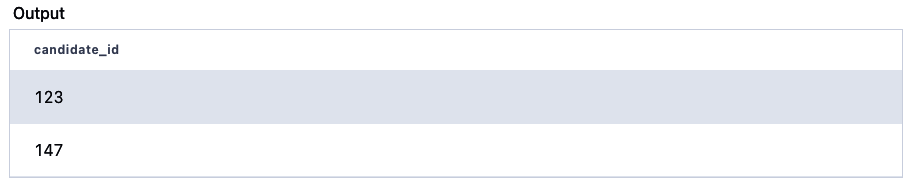

In [75]:
Image(filename='./resources/1.png')

***

### Facebook | Page With No Likes

[Question](https://datalemur.com/questions/sql-page-with-no-likes): <br>
Assume you're given two tables containing data about Facebook Pages and their respective likes (as in "Like a Facebook Page").

Write a query to return the IDs of the Facebook pages that have zero likes. The output should be sorted in ascending order based on the page IDs.

```sql
SELECT 
  pages.page_id
FROM 
    pages 
    LEFT JOIN 
    page_likes 
    ON pages.page_id = page_likes.page_id
GROUP BY 1
HAVING COUNT(page_likes.user_id) = 0
ORDER BY 1;
```

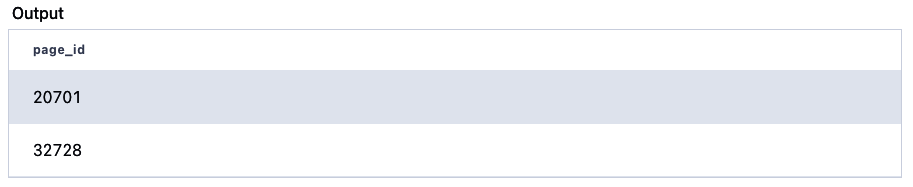

In [76]:
Image(filename='./resources/2.png')

***

### New York Times | Laptop vs. Mobile Viewership

[Question](https://datalemur.com/questions/laptop-mobile-viewership): <br>
Assume you're given the table on user viewership categorised by device type where the three types are laptop, tablet, and phone.

Write a query that calculates the total viewership for laptops and mobile devices where mobile is defined as the sum of tablet and phone viewership. Output the total viewership for laptops as laptop_reviews and the total viewership for mobile devices as mobile_views.

```sql
SELECT 
  SUM(CASE
    WHEN device_type = 'laptop' THEN 1
    ELSE 0
    END) AS "laptop_views",
  SUM(CASE
    WHEN device_type IN ('phone','tablet') THEN 1
    ELSE 0
    END) AS "mobile_views"
FROM viewership;
```

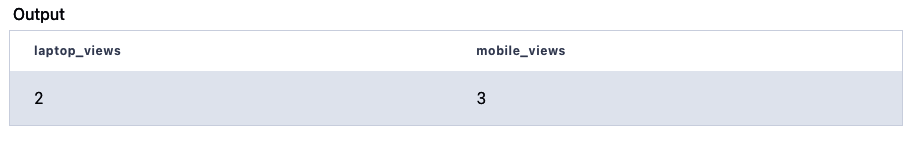

In [8]:
Image(filename='./resources/3.png')

***

### Amazon | Average Review Ratings

[Question](https://datalemur.com/questions/sql-avg-review-ratings): <br>
Given the reviews table, write a query to retrieve the average star rating for each product, grouped by month. The output should display the month as a numerical value, product ID, and average star rating rounded to two decimal places. Sort the output first by month and then by product ID.

```sql
SELECT 
  EXTRACT(MONTH FROM submit_date) as "mth", 
  product_id as "product",
  ROUND(AVG(stars),2) as "avg_stars"
FROM reviews
GROUP BY 
  EXTRACT(MONTH FROM submit_date),
  product_id
ORDER BY
  "mth" ASC,
  "product" ASC
```

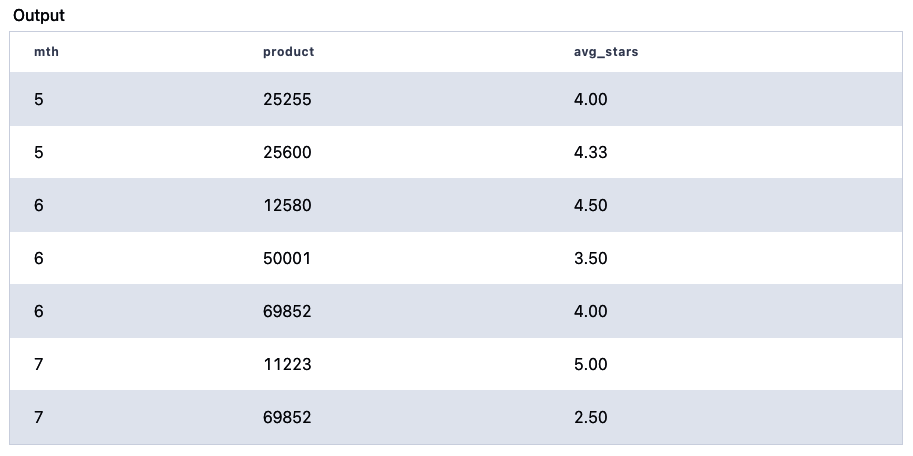

In [68]:
Image(filename='./resources/4.png')

***

### JPMorgan Chase | Cards Issued Difference

[Question](https://datalemur.com/questions/cards-issued-difference): <br>
Your team at JPMorgan Chase is preparing to launch a new credit card, and to gain some insights, you're analyzing how many credit cards were issued each month.

Write a query that outputs the name of each credit card and the difference in the number of issued cards between the month with the highest issuance cards and the lowest issuance. Arrange the results based on the largest disparity.

```sql
SELECT 
    card_name, 
    MAX(issued_amount)-MIN(issued_amount) "difference"
FROM monthly_cards_issued
GROUP BY card_name
ORDER BY 2 DESC;
```

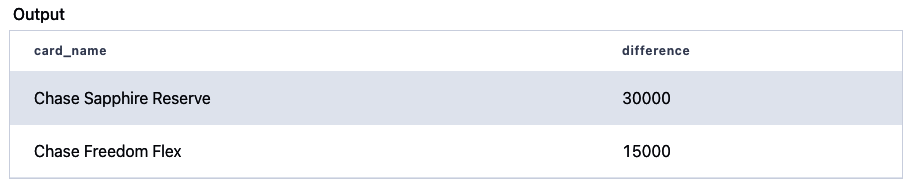

In [69]:
Image(filename='./resources/5.png')

***

### CVS Health | Pharmacy Analytics (Part 1)

[Question](https://datalemur.com/questions/top-profitable-drugs): <br>
CVS Health is trying to better understand its pharmacy sales, and how well different products are selling. Each drug can only be produced by one manufacturer.

Write a query to find the top 3 most profitable drugs sold, and how much profit they made. Assume that there are no ties in the profits. Display the result from the highest to the lowest total profit.

Definition:
- cogs stands for Cost of Goods Sold which is the direct cost associated with producing the drug.
- Total Profit = Total Sales - Cost of Goods Sold

```sql
SELECT 
    drug, 
    (total_sales-cogs) as "total_profit"
FROM pharmacy_sales
ORDER BY "total_profit" DESC
LIMIT 3;
```

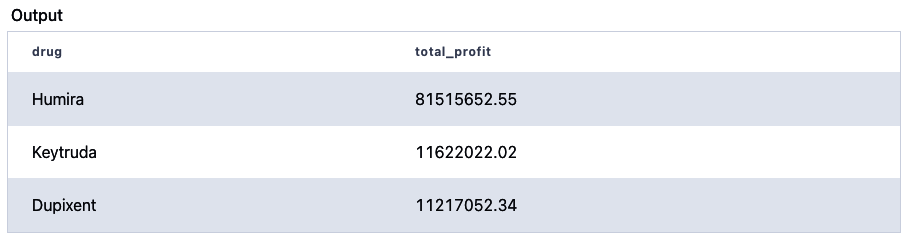

In [5]:
Image(filename='./resources/6.png')

***

### CVS | Pharmacy Analytics (Part 2)

[Question](https://datalemur.com/questions/non-profitable-drugs):<br>
CVS Health is analyzing its pharmacy sales data, and how well different products are selling in the market. Each drug is exclusively manufactured by a single manufacturer.

Write a query to identify the manufacturers associated with the drugs that resulted in losses for CVS Health and calculate the total amount of losses incurred.

Output the manufacturer's name, the number of drugs associated with losses, and the total losses in absolute value. Display the results sorted in descending order with the highest losses displayed at the top.

```sql
WITH loss_cte AS (
  SELECT 
    manufacturer,
    ABS(total_sales - cogs) AS loss
  FROM pharmacy_sales
  WHERE total_sales - cogs < 0
)

SELECT 
  manufacturer,
  COUNT(*) AS drug_count,
  SUM(loss) AS total_loss
FROM loss_cte
GROUP BY 1
ORDER BY 3 DESC;

```

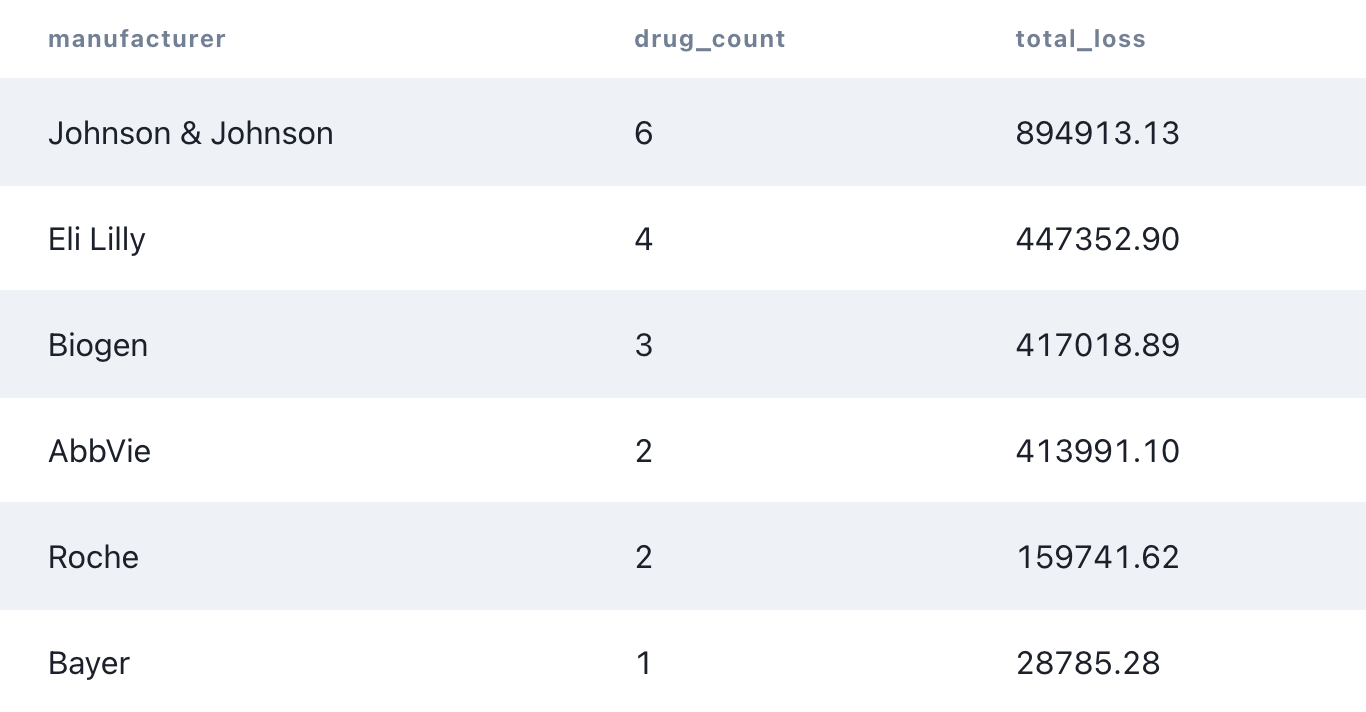

In [6]:
Image(filename='./resources/15.png')

***

### CVS | Pharmacy Analytics (Part 3)

[Question](https://datalemur.com/questions/total-drugs-sales):<br>
CVS Health wants to gain a clearer understanding of its pharmacy sales and the performance of various products.

Write a query to calculate the total drug sales for each manufacturer. Round the answer to the nearest million and report your results in descending order of total sales. In case of any duplicates, sort them alphabetically by the manufacturer name.

Since this data will be displayed on a dashboard viewed by business stakeholders, please format your results as follows: "$36 million".

```sql
SELECT 
  manufacturer,
  CONCAT('$',ROUND(SUM(total_sales)/1000000),' million') AS sale
FROM pharmacy_sales
GROUP BY 1
ORDER BY SUM(total_sales) DESC, manufacturer ASC
```

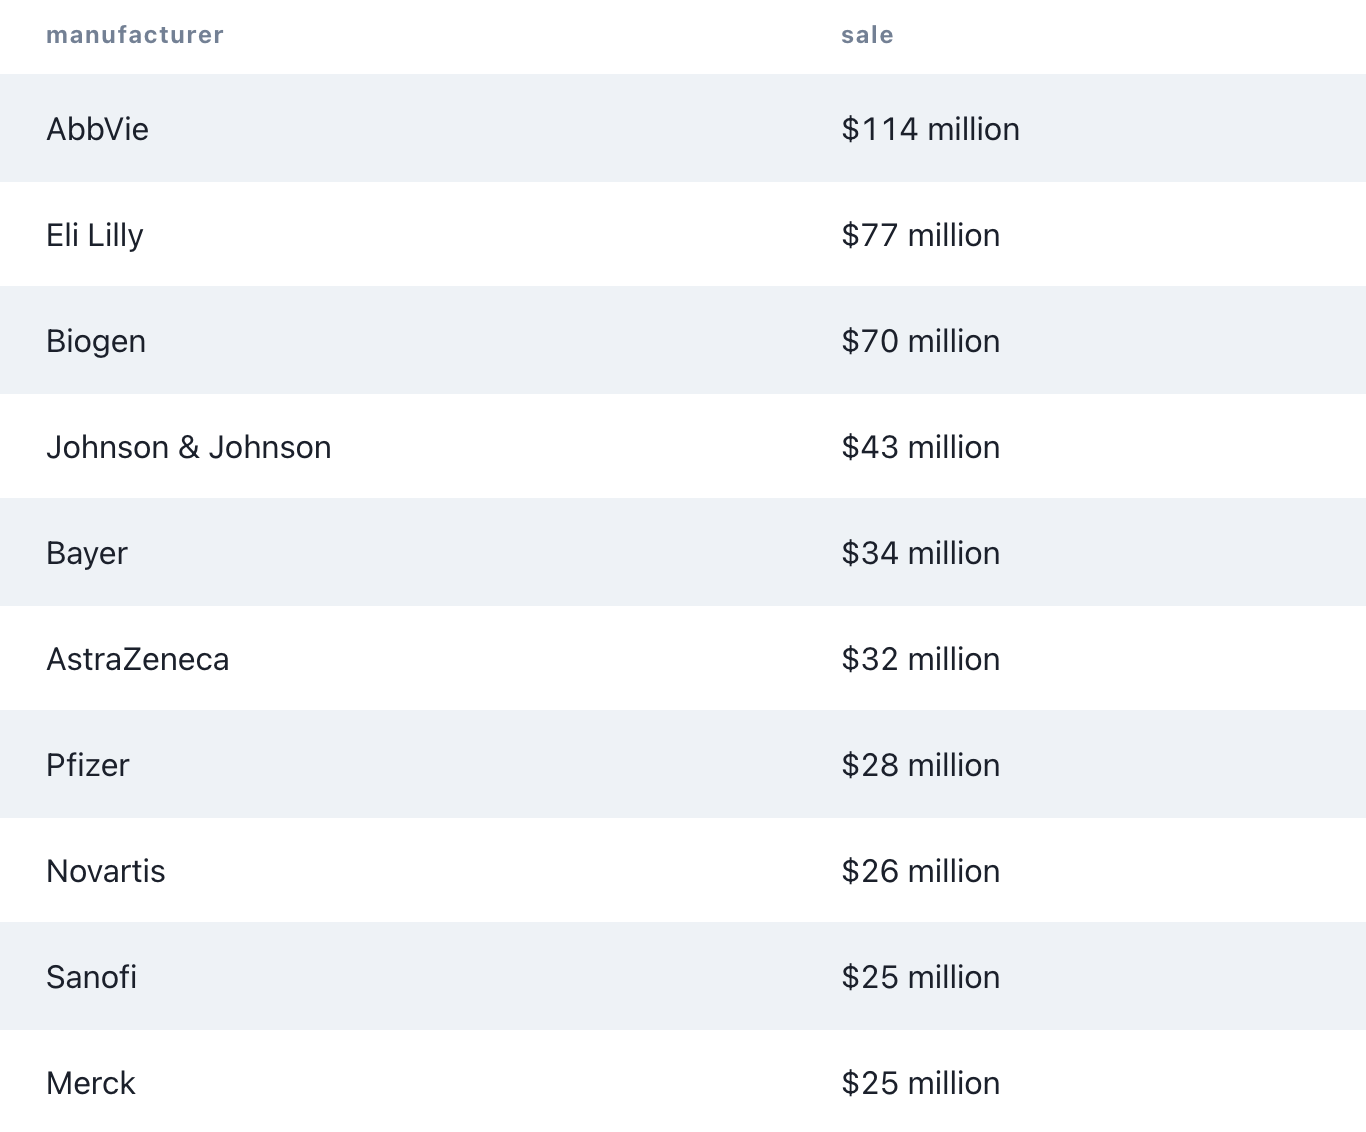

In [8]:
Image(filename='./resources/16.png')

***

### Tesla | Unfinished Parts

[Question](https://datalemur.com/questions/tesla-unfinished-parts): <br>
Tesla is investigating production bottlenecks and they need your help to extract the relevant data. Write a query to determine which parts have begun the assembly process but are not yet finished.

Assumptions:
- parts_assembly table contains all parts currently in production, each at varying stages of the assembly process.
- An unfinished part is one that lacks a finish_date.

```sql
SELECT 
    part,
    assembly_step
FROM parts_assembly
WHERE finish_date IS NULL;
```

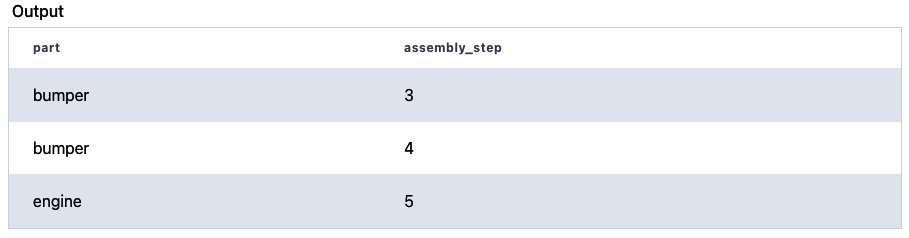

In [71]:
Image(filename='./resources/7.png')

***

### TikTok | Second Day Confirmation

[Question](https://datalemur.com/questions/second-day-confirmation): <br>
Assume you're given tables with information about TikTok user sign-ups and confirmations through email and text. New users on TikTok sign up using their email addresses, and upon sign-up, each user receives a text message confirmation to activate their account.

Write a query to display the user IDs of those who did not confirm their sign-up on the first day, but confirmed on the second day.

Definition:
- action_date refers to the date when users activated their accounts and confirmed their sign-up through text messages.

```sql
SELECT 
    user_id
FROM 
    emails 
    JOIN 
    texts 
    ON emails.email_id = texts.email_id
WHERE 
    signup_action = 'Confirmed' AND 
    EXTRACT(DAY FROM action_date-signup_date) = 1;
```

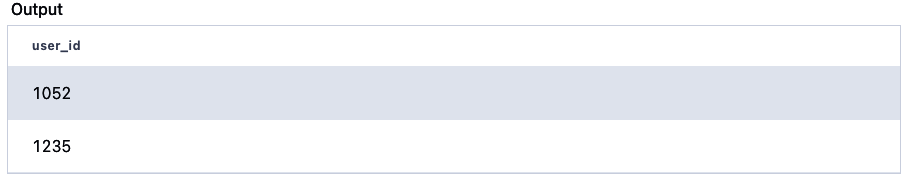

In [72]:
Image(filename='./resources/8.png')

***

### Facebook | Page With No Likes

[Question](https://datalemur.com/questions/sql-average-post-hiatus-1): <br>
Given a table of Facebook posts, for each user who posted at least twice in 2021, write a query to find the number of days between each user’s first post of the year and last post of the year in the year 2021. Output the user and number of the days between each user's first and last post.

```sql
SELECT 
    user_id,
    EXTRACT(DAY FROM MAX(post_date)-MIN(post_date)) AS days_between
FROM posts
WHERE EXTRACT(YEAR FROM post_date) = 2021
GROUP BY user_id
HAVING COUNT(*)>=2;
```

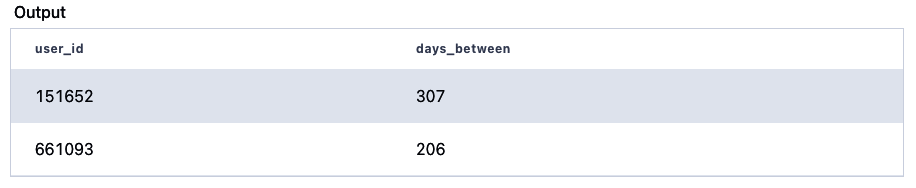

In [77]:
Image(filename='./resources/9.png')

***

### Robinhood | Cities With Completed trades

[Question](https://datalemur.com/questions/completed-trades): <br>
Assume you're given the tables containing completed trade orders and user details in a Robinhood trading system.

Write a query to retrieve the top three cities that have the highest number of completed trade orders listed in descending order. Output the city name and the corresponding number of completed trade orders.

```sql
SELECT 
    city,
    COUNT(*) "total_orders"
FROM 
    trades t 
    INNER JOIN 
    users u 
    ON t.user_id = u.user_id
WHERE status = 'Completed'
GROUP BY city
ORDER BY "total_orders" DESC
LIMIT 3;
```

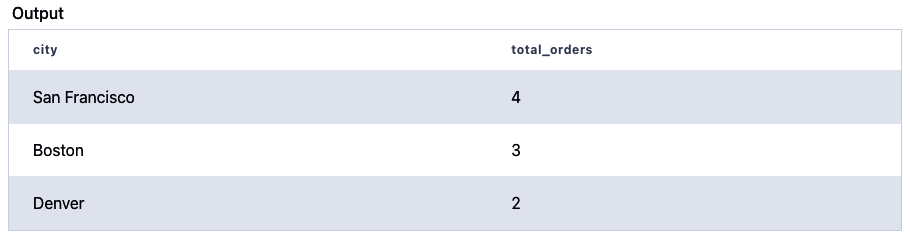

In [74]:
Image(filename='./resources/10.png')

***

### Twitter | Histogram of Tweets

[Question](https://datalemur.com/questions/sql-histogram-tweets):<br>
Assume you're given a table Twitter tweet data, write a query to obtain a histogram of tweets posted per user in 2022. Output the tweet count per user as the bucket and the number of Twitter users who fall into that bucket.

In other words, group the users by the number of tweets they posted in 2022 and count the number of users in each group.

```sql
with tweet_buckets AS (
  SELECT 
    user_id,
    COUNT(*) AS num_tweets
  FROM tweets
  WHERE
    EXTRACT(YEAR FROM "tweet_date") = 2022
  GROUP BY 1
)

SELECT
  num_tweets AS "tweet_bucket",
  COUNT(*) AS "users_num"
FROM tweet_buckets
GROUP BY 1;
```

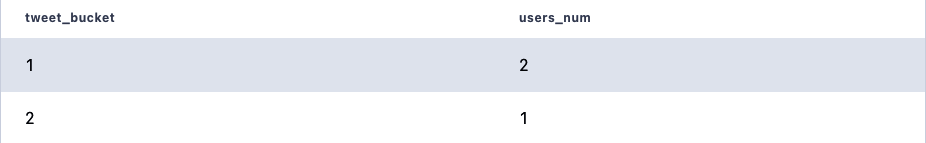

In [4]:
Image(filename='./resources/11.png')

***

### Microsoft | Teams Power Users

[Question](https://datalemur.com/questions/teams-power-users):<br>
Write a query to identify the top 2 Power Users who sent the highest number of messages on Microsoft Teams in August 2022. Display the IDs of these 2 users along with the total number of messages they sent. Output the results in descending order based on the count of the messages.

Assumption:
- No two users have sent the same number of messages in August 2022.

```sql
SELECT 
  sender_id,
  COUNT(*) AS "message_count"
FROM messages
WHERE
  EXTRACT(YEAR FROM sent_date) = 2022 AND
  EXTRACT(MONTH FROM sent_date) = 8
GROUP BY sender_id
ORDER BY 2 DESC
LIMIT 2;
```

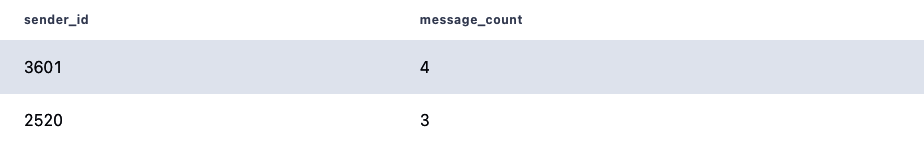

In [6]:
Image(filename='./resources/12.png')

***

### FAANG | Well Paid Employees

[Question](https://datalemur.com/questions/sql-well-paid-employees):<br>
Companies often perform salary analyses to ensure fair compensation practices. One useful analysis is to check if there are any employees earning more than their direct managers.

As a HR Analyst, you're asked to identify all employees who earn more than their direct managers. The result should include the employee's ID and name.

```sql
SELECT 
  e1.employee_id,
  e1.name AS employee_name
FROM  
  employee e1
  JOIN
  employee e2 
  ON e1.manager_id = e2.employee_id
WHERE
  e1.salary > e2.salary;
```

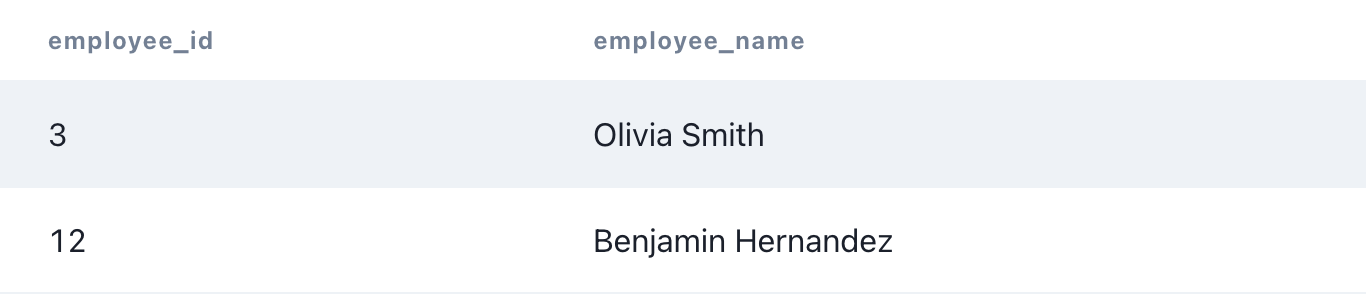

In [3]:
Image(filename='./resources/13.png')

***

### Oracle | Who Made Quota? 

[Question](https://datalemur.com/questions/oracle-sales-quota):<br>
As a data analyst on the Oracle Sales Operations team, you are given a list of salespeople’s deals, and the annual quota they need to hit.

Write a query that outputs each employee id and whether they hit the quota or not ('yes' or 'no'). Order the results by employee id in ascending order.

Definitions:
- deal_size: Deals acquired by a salesperson in the year. Each salesperson may have more than 1 deal.
- quota: Total annual quota for each salesperson.


```sql
WITH employee_sales AS (
  SELECT
    employee_id,
    SUM(deal_size) AS sales
  FROM
    deals
  GROUP BY
    1
)

SELECT
  employee_sales.employee_id,
  CASE
    WHEN employee_sales.sales >= sales_quotas.quota THEN 'yes'
    ELSE 'no'
  END AS made_quota
FROM 
  employee_sales
  JOIN
  sales_quotas 
  ON employee_sales.employee_id = sales_quotas.employee_id
ORDER BY 1 ASC;
```

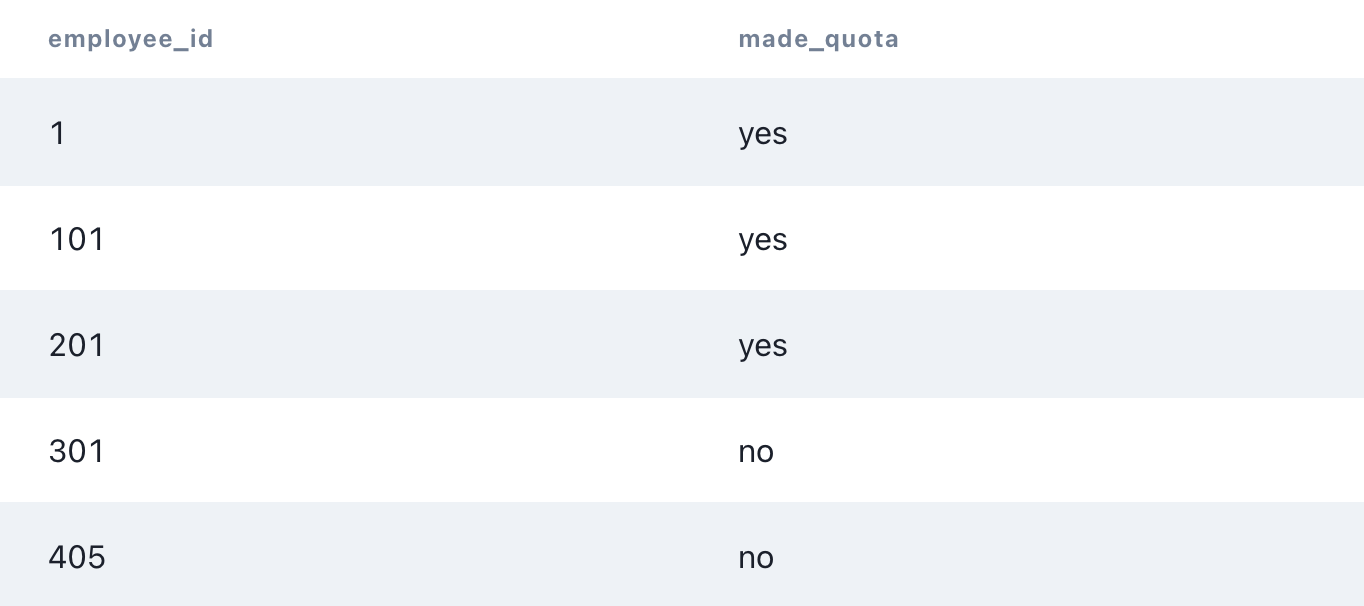

In [3]:
Image(filename='./resources/14.png')

***

### UnitedHealth | Patient Support Analysis (Part 1) 

[Question](https://datalemur.com/questions/frequent-callers):<br>
UnitedHealth Group (UHG) has a program called Advocate4Me, which allows policy holders (or, members) to call an advocate and receive support for their health care needs – whether that's claims and benefits support, drug coverage, pre- and post-authorisation, medical records, emergency assistance, or member portal services.

Write a query to find how many UHG policy holders made three, or more calls, assuming each call is identified by the case_id column.

```sql
WITH calls_per_holder AS (
  SELECT 
  policy_holder_id,
  COUNT(DISTINCT case_id) AS num_calls
  FROM callers
  GROUP BY policy_holder_id
)

SELECT COUNT(*) AS policy_holder_count
FROM calls_per_holder
WHERE num_calls >= 3;


```

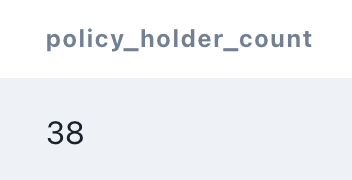

In [4]:
Image(filename='./resources/17.png')

***

### IBM | IBM db2 Product Analytics 

[Question](https://datalemur.com/questions/sql-ibm-db2-product-analytics):<br>
IBM is analyzing how their employees are utilizing the Db2 database by tracking the SQL queries executed by their employees. The objective is to generate data to populate a histogram that shows the number of unique queries run by employees during the third quarter of 2023 (July to September). Additionally, it should count the number of employees who did not run any queries during this period.

Display the number of unique queries as histogram categories, along with the count of employees who executed that number of unique queries.

```sql
WITH third_quarter_queries AS (
  SELECT 
    *
  FROM 
    queries q
  WHERE EXTRACT(MONTH FROM query_starttime) BETWEEN 7 AND 9
),
employee_query_count AS (

  SELECT
    e.employee_id,
    COALESCE(COUNT(DISTINCT query_id),0) AS num_queries
  FROM
    employees e
    LEFT JOIN
    third_quarter_queries ttq
    ON e.employee_id = ttq.employee_id
  GROUP BY 1
)

SELECT
  num_queries AS "unique_queries",
  COUNT(employee_id) AS "employee_count"
FROM employee_query_count
GROUP BY 1
ORDER BY 1;
```

**NOTE**: While the query is easy, aggregate functions such as COUNT() ignore NULL values, we need to use COALESCE() to deal with this situation. This was the tricky part.

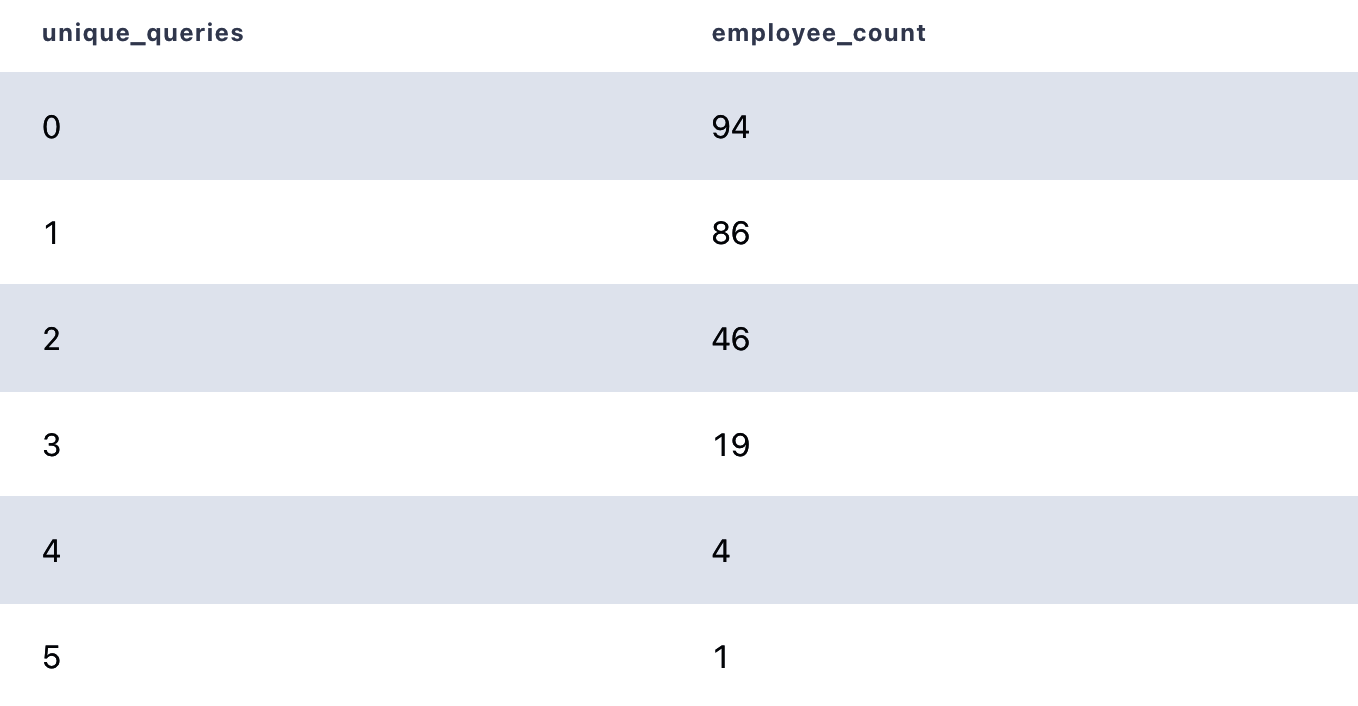

In [6]:
Image(filename='./resources/18.png')

***

### Facebook | App Click-through Rate (CTR) 

[Question](https://datalemur.com/questions/click-through-rate):<br>
Assume you have an events table on Facebook app analytics. Write a query to calculate the click-through rate (CTR) for the app in 2022 and round the results to 2 decimal places.

Definition and note:
- Percentage of click-through rate (CTR) = 100.0 * Number of clicks / Number of impressions
- To avoid integer division, multiply the CTR by 100.0, not 100.

```sql
WITH impressions_vs_clicks AS (
  SELECT 
    app_id,
    SUM(
      CASE
        WHEN event_type LIKE 'impression' THEN 1
        ELSE 0
      END
    ) AS impressions,
    SUM(
      CASE
        WHEN event_type LIKE 'click' THEN 1
        ELSE 0
      END 
    ) AS clicks
  FROM events
  WHERE EXTRACT(YEAR FROM timestamp) = 2022
  GROUP BY app_id
)

SELECT 
  app_id,
  ROUND(100.0 * clicks / impressions, 2) AS ctr
FROM impressions_vs_clicks;
```

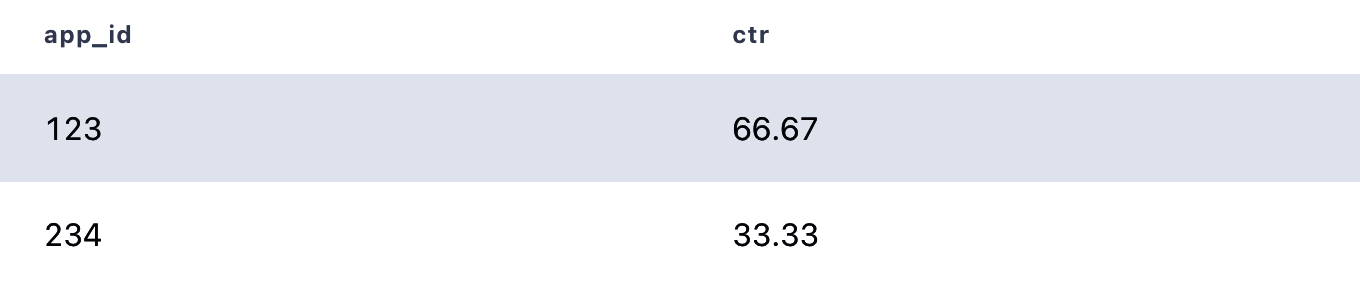

In [7]:
Image(filename='./resources/19.png')

***

### Alibaba | Compressed Mean

[Question](https://datalemur.com/questions/alibaba-compressed-mean):<br>
You're trying to find the mean number of items per order on Alibaba, rounded to 1 decimal place using tables which includes information on the count of items in each order (item_count table) and the corresponding number of orders for each item count (order_occurrences table).

```sql
SELECT 
  ROUND(CAST(SUM(item_count * order_occurrences) / SUM(order_occurrences) AS NUMERIC), 1) AS mean
FROM items_per_order;

```

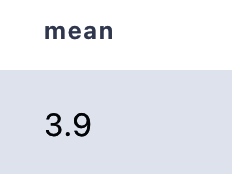

In [8]:
Image(filename='./resources/20.png')

***

### NVIDIA | Product Line Revenue 

[Question](https://datalemur.com/questions/revenue-by-product-line):<br>
As a business analyst on the revenue forecasting team at NVIDIA, you are given a table of NVIDIA transactions in 2021.

Write a query to summarize the total sales revenue for each product line. The product line with the highest revenue should be at the top of the results.

Assumption:
- There will be at least one sale of each product line.

```sql
SELECT
  product_line,
  SUM(amount) AS total_revenue
FROM 
  product_info
  INNER JOIN 
  transactions
  ON product_info.product_id = transactions.product_id
GROUP BY product_line
ORDER BY 2 DESC;
```

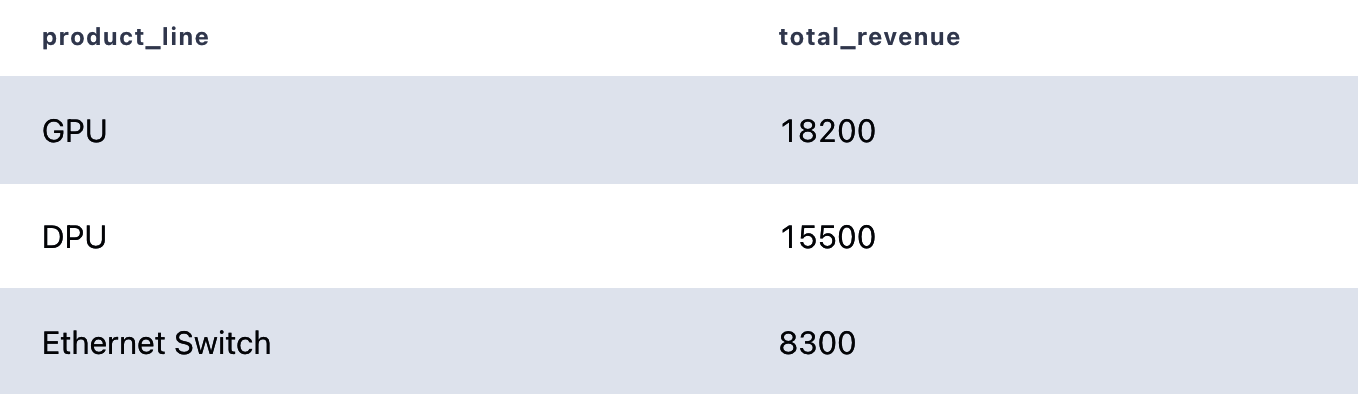

In [9]:
Image(filename='./resources/21.png')

***

### Yelp | Top Rated Businesses 

[Question](https://datalemur.com/questions/sql-top-businesses):<br>
Assume you are given the table below containing information on user reviews. Write a query to obtain the number and percentage of businesses that are top rated. A top-rated busines is defined as one whose reviews contain only 4 or 5 stars.

Output the number of businesses and percentage of top rated businesses rounded to the nearest integer.

Assumption:
- Each business has only one review (which is the business' average rating).

```sql
SELECT 
  (SELECT COUNT(*) FROM reviews WHERE review_stars IN (4,5)) AS business_count,
  100 * (SELECT COUNT(*) FROM reviews WHERE review_stars IN (4,5)) / COUNT(*) AS top_rated_pct
FROM reviews

```

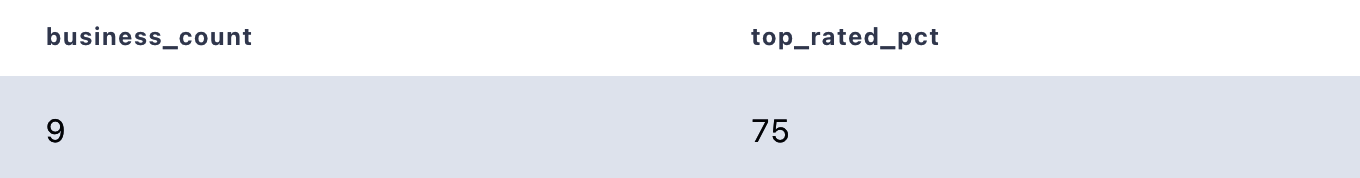

In [10]:
Image(filename='./resources/22.png')

***

### Google | Ad Campaign ROAS 

[Question](https://datalemur.com/questions/ad-campaign-roas):<br>
Google marketing managers are analyzing the performance of various advertising accounts over the last month. They need your help to gather the relevant data.

Write a query to calculate the return on ad spend (ROAS) for each advertiser across all ad campaigns. Round your answer to 2 decimal places, and order your output by the advertiser_id.

```sql
SELECT
  advertiser_id,
  ROUND(CAST(SUM(revenue)/SUM(spend) AS NUMERIC), 2) AS ROAS
FROM ad_campaigns
GROUP BY advertiser_id
ORDER BY 1;
```

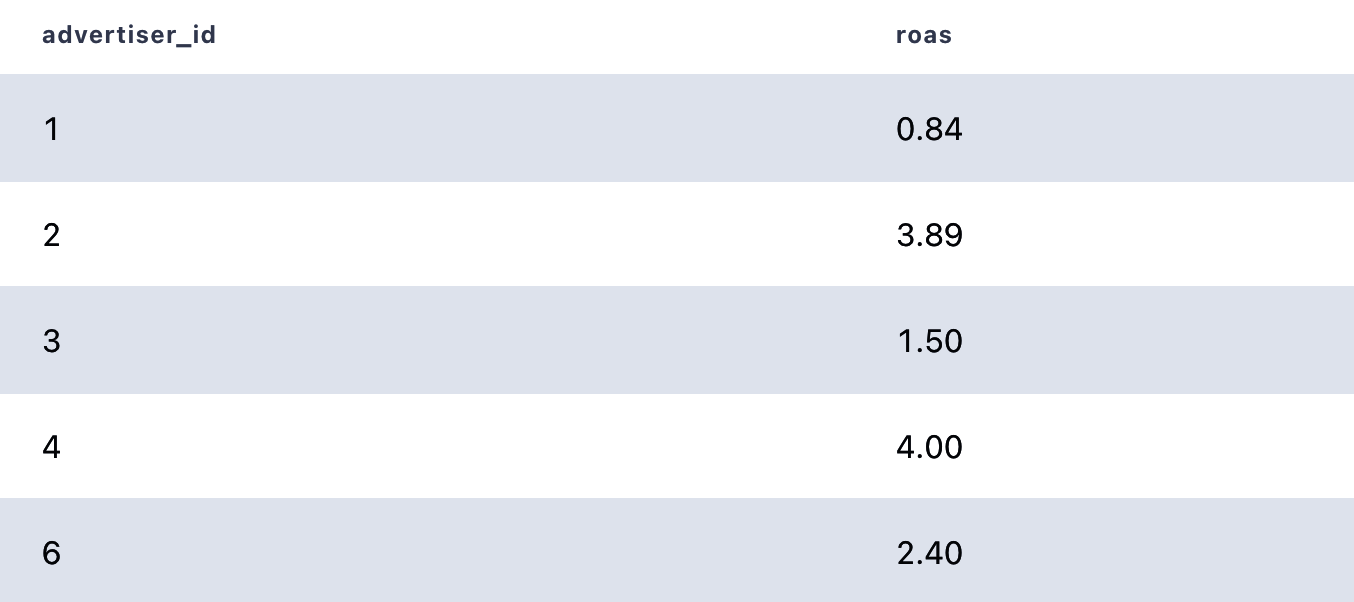

In [11]:
Image(filename='./resources/23.png')

***

### Accenture | Subject Matter Experts

[Question](https://datalemur.com/questions/subject-matter-experts):<br>
You are tasked with identifying Subject Matter Experts (SMEs) at Accenture based on their work experience in specific domains. An employee qualifies as an SME if they meet either of the following criteria:

1. They have 8 or more years of work experience in a single domain.
2. They have 12 or more years of work experience across two different domains.
Write a query to return the employee IDs of all the subject matter experts at Accenture.

Assumption:
- An employee can only be considered an SME if they meet the experience requirements in either one or two domains. Cases where an employee has experience in more than two domains can be disregarded.

```sql
SELECT 
  employee_id
FROM employee_expertise
GROUP BY employee_id
HAVING 
  CASE
    WHEN COUNT(*) = 1 THEN SUM(years_of_experience) >= 8
    WHEN COUNT(*) = 2 THEN SUM(years_of_experience) >= 12
  END
```

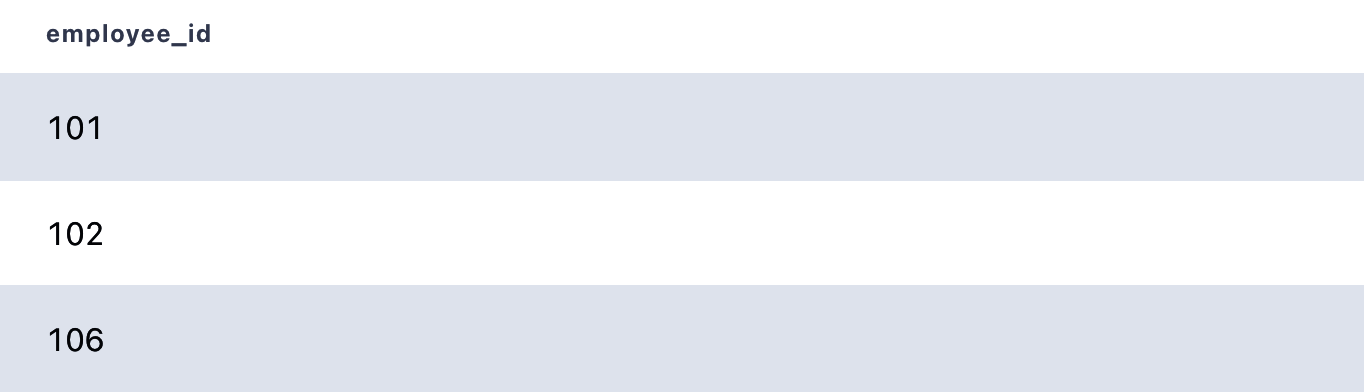

In [12]:
Image(filename='./resources/24.png')

***

### Visa | ApplePay Volume 

[Question](https://datalemur.com/questions/apple-pay-volume):<br>
Visa is analysing its partnership with ApplyPay. Calculate the total transaction volume for each merchant where the transaction was performed via ApplePay.

Output the merchant ID and the total transactions. For merchants with no ApplePay transactions, output their total transaction volume as 0. Display the result in descending order of the transaction volume.

```sql
SELECT 
  merchant_id,
  SUM(
    CASE
      WHEN LOWER(payment_method) LIKE 'apple pay' THEN transaction_amount
      ELSE 0
    END
  ) AS total_transaction
FROM transactions
GROUP BY merchant_id
ORDER BY 2 DESC;
```

**LIKE by default is case-sensitive user LOWER() or UPPER() WHEN DEALING WITH DIFFERENT SPELLINGS**

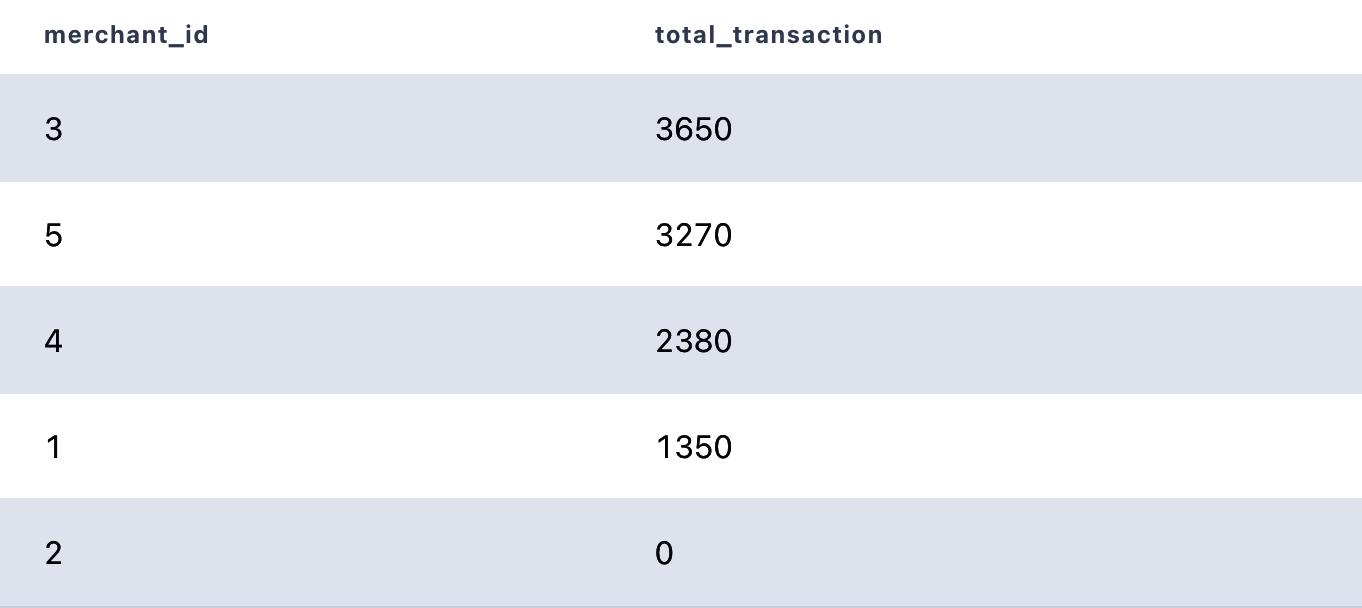

In [14]:
Image(filename='./resources/25.png')

***

### Paypal | Final Account Balance 

[Question](https://datalemur.com/questions/final-account-balance):<br>
Given a table containing information about bank deposits and withdrawals made using Paypal, write a query to retrieve the final account balance for each account, taking into account all the transactions recorded in the table with the assumption that there are no missing transactions account.

```sql
SELECT
  account_id,
  SUM(
    CASE
      WHEN LOWER(transaction_type) LIKE 'deposit' THEN amount
      ELSE -amount
    END
  ) AS final_balance
FROM transactions
GROUP BY account_id
```

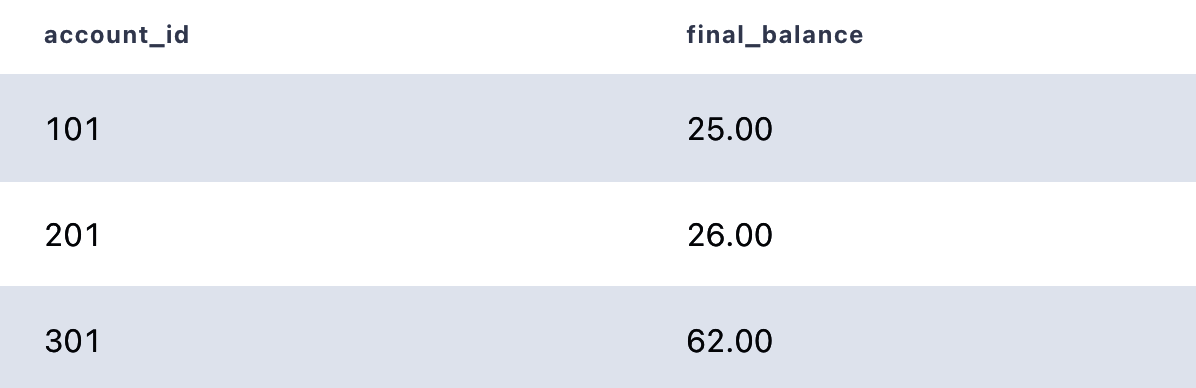

In [2]:
Image(filename='./resources/26.png')

***

### Snowflake | Webinar Popularity 

[Question](https://datalemur.com/questions/snowflake-webinar-popularity):<br>
As a Data Analyst on Snowflake's Marketing Analytics team, you're analyzing the CRM to determine what percent of marketing touches were of type "webinar" in April 2022. Round your percentage to the nearest integer.

```sql
SELECT
  ROUND((SELECT COUNT(*)
  FROM marketing_touches
  WHERE
    EXTRACT(MONTH FROM event_date) = 4
    AND
    EXTRACT(YEAR FROM event_date) = 2022
    AND 
    LOWER(event_type) LIKE 'webinar') * 100.0 / COUNT(*), 0) AS webinar_pct
FROM marketing_touches
WHERE
  EXTRACT(MONTH FROM event_date) = 4
  AND
  EXTRACT(YEAR FROM event_date) = 2022
```

**Marketing touches, also known as touch points are the brand's point of contact with the customers, from start to finish.**

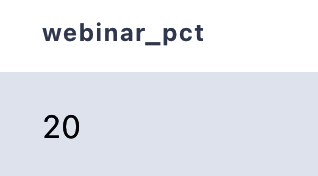

In [4]:
Image(filename='./resources/27.png')

***

### Apple | Trade In Payouts 

[Question](https://datalemur.com/questions/trade-in-payouts):<br>
Apple has a trade-in program where their customers can return the old iPhone device to Apple and Apple gives the customers the trade-in value (known as payout) of the device in cash.

For each store, write a query of the total revenue from the trade-in. Order the result by the descending order.

```sql
SELECT 
  store_id,
  SUM(payout_amount) AS payout_total
FROM
  trade_in_transactions tt
  JOIN
  trade_in_payouts tp
  ON tt.model_id = tp.model_id
GROUP BY store_id
ORDER BY 2 DESC;
```

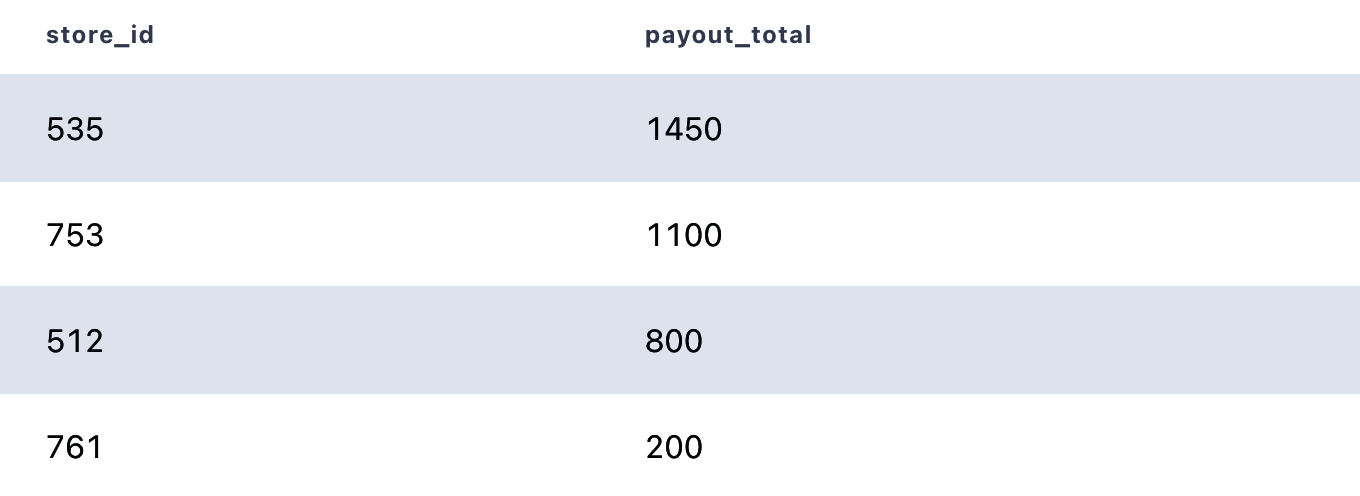

In [5]:
Image(filename='./resources/28.png')

***

### Amazon | Most Expensive Purchase 

[Question](https://datalemur.com/questions/most-expensive-purchase):<br>
Amazon is trying to identify their high-end customers. To do so, they first need your help to write a query that obtains the most expensive purchase made by each customer. Order the results by the most expensive purchase first.

```sql
SELECT 
  customer_id,
  MAX(purchase_amount) AS purchase_amount
FROM transactions
GROUP BY customer_id
ORDER BY 2 DESC;
```

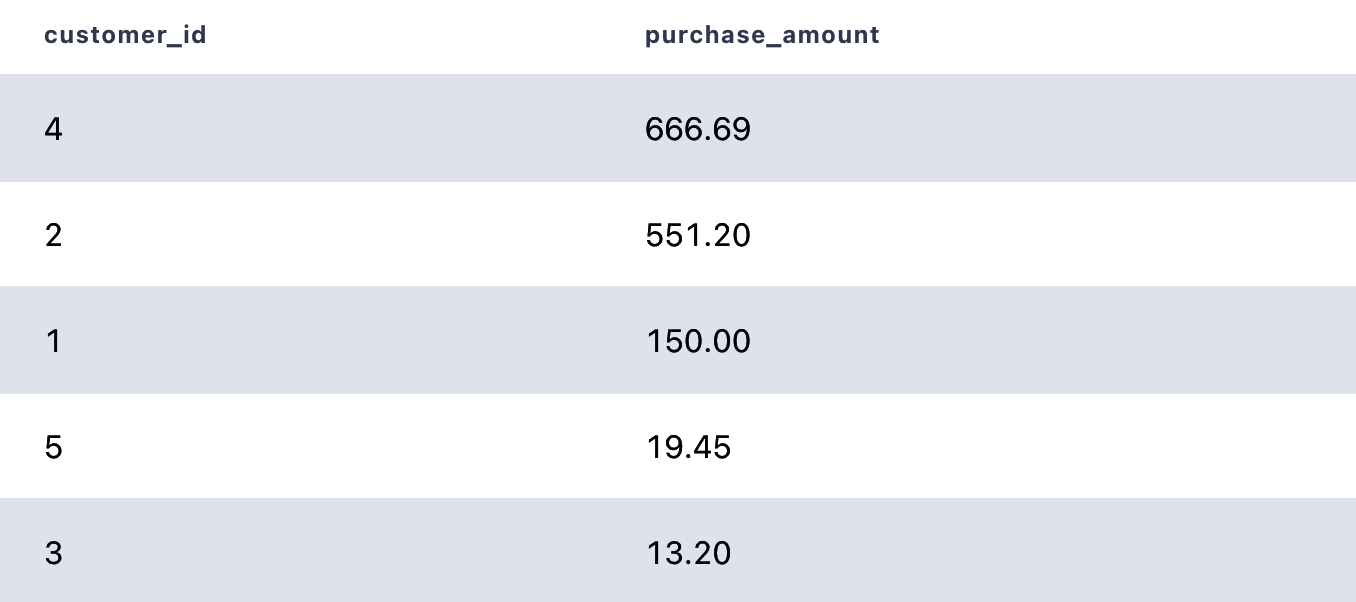

In [6]:
Image(filename='./resources/29.png')

***

### eBay | Highest Number of Products

[Question](https://datalemur.com/questions/sql-highest-products):<br>
Assume that you are given the table below containing information on various orders made by eBay customers. Write a query to obtain the user IDs and number of products purchased by the top 3 customers; these customers must have spent at least $1,000 in total.

Output the user id and number of products in descending order. To break ties (i.e., if 2 customers both bought 10 products), the user who spent more should take precedence.

```sql
SELECT
  user_id,
  COUNT(product_id) AS product_num
FROM user_transactions
GROUP BY user_id
HAVING SUM(spend) >= 1000
ORDER BY COUNT(product_id) DESC, SUM(spend) DESC
LIMIT 3;
```

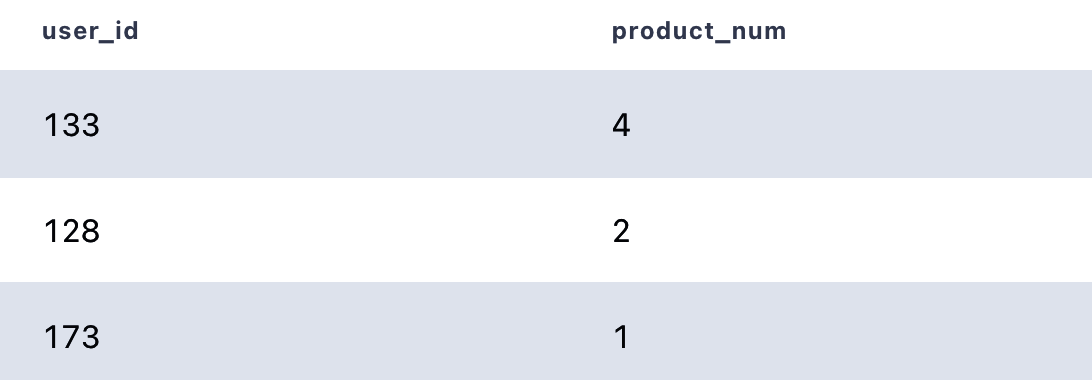

In [7]:
Image(filename='./resources/30.png')

***

### Intuit | QuickBooks vs TurboTax 

[Question](https://datalemur.com/questions/quickbooks-vs-turbotax):<br>
Intuit provides a range of tax filing products, including TurboTax and QuickBooks, available in various versions.

Write a query to determine the total number of tax filings made using TurboTax and QuickBooks. Each user can file taxes once a year using only one product.

```sql
SELECT 
  SUM(
    CASE
      WHEN LOWER(product) LIKE 'turbotax%' THEN 1
      ELSE 0
    END
  ) AS turbotax_total,
  SUM(
    CASE
      WHEN LOWER(product) LIKE 'quickbooks%' THEN 1
      ELSE 0
    END
  ) AS quickbooks_total
FROM filed_taxes
```

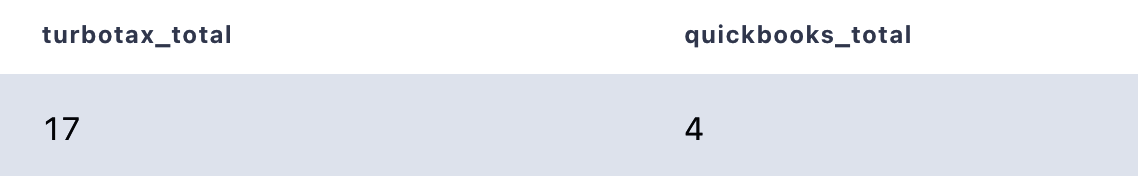

In [9]:
Image(filename='./resources/31.png')

***

### LinkedIn | LinkedIn Power Creators (Part 1) 

[Question](https://datalemur.com/questions/linkedin-power-creators):<br>
The LinkedIn Creator team is seeking out individuals who have a strong influence on the platform, utilizing their personal profiles as a company or influencer page. To identify such power creators, we can compare the number of followers on their LinkedIn page with the number of followers on the company they work for. If a person's LinkedIn page has more followers than their company, we consider them to be a power creator.

Write a query to retrieve the profile IDs of these LinkedIn power creators ordered in ascending order based on their IDs.

Assumptions:
- Each individual in the database has a LinkedIn profile associated with a single company.
- The ```personal_profiles``` and ```company_pages``` tables are connected via the ```employer_id``` and ```company_id columns```, respectively.

```sql
SELECT 
  profile_id
FROM
  personal_profiles pp
  JOIN
  company_pages cp
  ON pp.employer_id = cp.company_id
WHERE pp.followers > cp.followers
ORDER BY 1 ASC;
```

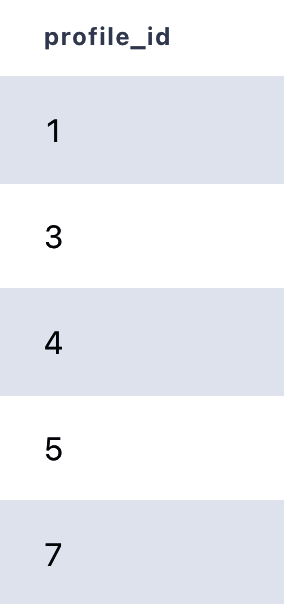

In [10]:
Image(filename='./resources/32.png')

***

### Linkedin | Duplicate Job Listings 

[Question](https://datalemur.com/questions/duplicate-job-listings):<br>
This is the same question as problem #8 in the SQL Chapter of Ace the Data Science Interview!

Assume you're given a table containing job postings from various companies on the LinkedIn platform. Write a query to retrieve the count of companies that have posted duplicate job listings.

Definition:
- Duplicate job listings are defined as two job listings within the same company that share identical titles and descriptions.

```sql
SELECT COUNT(*) AS duplicate_companies
FROM
  (
    SELECT
      company_id, 
      LOWER(title), 
      LOWER(description)
    FROM job_listings
    GROUP BY company_id, LOWER(title), LOWER(description)
    HAVING COUNT(*) >= 2
  ) AS temp
```

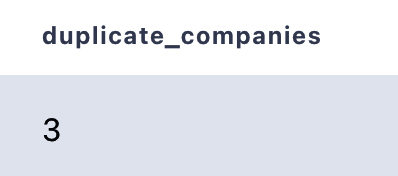

In [11]:
Image(filename='./resources/33.png')

***

### Microsoft | Spare Server Capacity 

[Question](https://datalemur.com/questions/sql-spare-server-capacity):<br>
Microsoft Azure's capacity planning team wants to understand how much data its customers are using, and how much spare capacity is left in each of its data centers. You’re given three tables: customers, data centers, and forecasted_demand.

Write a query to find each data centre’s total unused server capacity. Output the data center id in ascending order and the total spare capacity.

Definitions:
- ```monthly_capacity``` is the total monthly server capacity for each centers.
- ```monthly_demand``` is the server demand for each customer.

```sql
WITH usage AS (
  SELECT
    datacenter_id,
    SUM(monthly_demand) AS demand
  FROM forecasted_demand
  GROUP BY datacenter_id
)

SELECT 
  d.datacenter_id,
  (monthly_capacity - demand) AS spare_capacity
FROM 
  datacenters d
  LEFT JOIN
  usage u
  ON 
  d.datacenter_id = u.datacenter_id
ORDER BY 1;
```

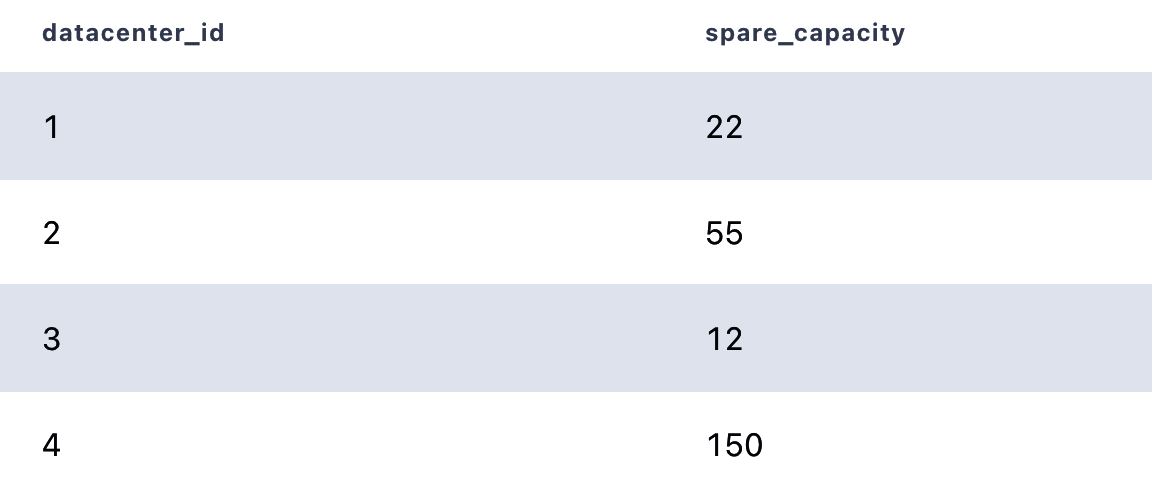

In [13]:
Image(filename='./resources/34.png')

## Medium

***

### Uber | User's Third Transaction

[Question](https://datalemur.com/questions/sql-third-transaction):<br>
Write a query to obtain the third transaction of every user. Output the user id, spend and transaction date.

```sql
WITH cte_ranked_orders AS (
  
  SELECT 
    *,
    ROW_NUMBER() OVER(PARTITION BY user_id ORDER BY transaction_date) AS order_num
  FROM transactions
  
),
cte_final_output AS (
  
  SELECT 
    user_id,
    spend,
    transaction_date 
  FROM cte_ranked_orders
  WHERE order_num = 3
)
SELECT * FROM cte_final_output;
```

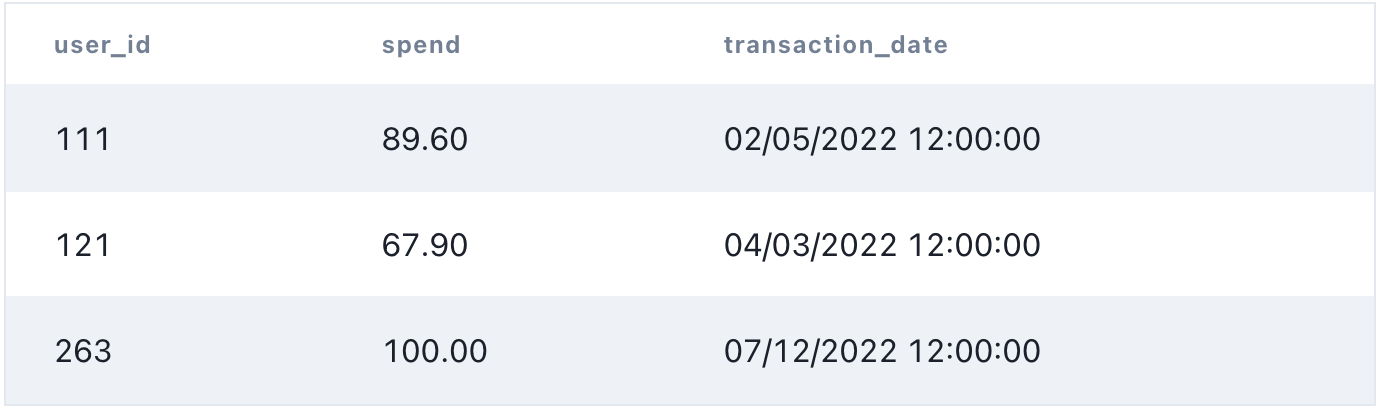

In [3]:
Image(filename='./resources/35.png')

***

### FAANG | Second Highest Salary

[Question](https://datalemur.com/questions/sql-second-highest-salary):<br>
Imagine you're an HR analyst at a tech company tasked with analyzing employee salaries. Your manager is keen on understanding the pay distribution and asks you to determine the second highest salary among all employees.

It's possible that multiple employees may share the same second highest salary. In case of duplicate, display the salary only once.

```sql
WITH cte_ranked_salary AS (
  
  SELECT
    *,
    DENSE_RANK() OVER(ORDER BY salary DESC) AS salary_rank
  FROM employee 
)
SELECT 
  DISTINCT salary
FROM cte_ranked_salary
WHERE salary_rank = 2;
```

**Another approach**: 
- Find maximum salary
- Filter results to salaries less than the maximum salary
- Find new maximum

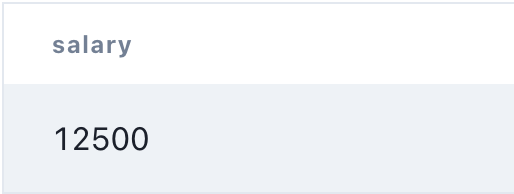

In [4]:
Image(filename='./resources/36.png')

***

### Snapchat | Sending vs. Opening Snaps

[Question](https://datalemur.com/questions/time-spent-snaps):<br>
Assume you're given tables with information on Snapchat users, including their ages and time spent sending and opening snaps.

Write a query to obtain a breakdown of the time spent sending vs. opening snaps as a percentage of total time spent on these activities grouped by age group. Round the percentage to 2 decimal places in the output.

```sql
WITH grouped_breakdown AS (
  SELECT
    age_bucket,
    SUM(
      CASE 
        WHEN activity_type = 'send' THEN time_spent
        ELSE 0
      END
    ) AS total_send_time,
    SUM(
      CASE 
        WHEN activity_type = 'open' THEN time_spent
        ELSE 0
      END
    ) AS total_open_time,
    SUM(
      CASE 
        WHEN activity_type IN ('send','open') THEN time_spent
        ELSE 0
      END
    ) AS total_send_open_time
  FROM 
    activities 
    JOIN
    age_breakdown
    ON activities.user_id = age_breakdown.user_id
  GROUP BY age_bucket
)

SELECT
  age_bucket,
  ROUND(100 * total_send_time / total_send_open_time, 2) AS send_perc,
  ROUND(100 * total_open_time / total_send_open_time, 2) AS open_perc
FROM grouped_breakdown
```

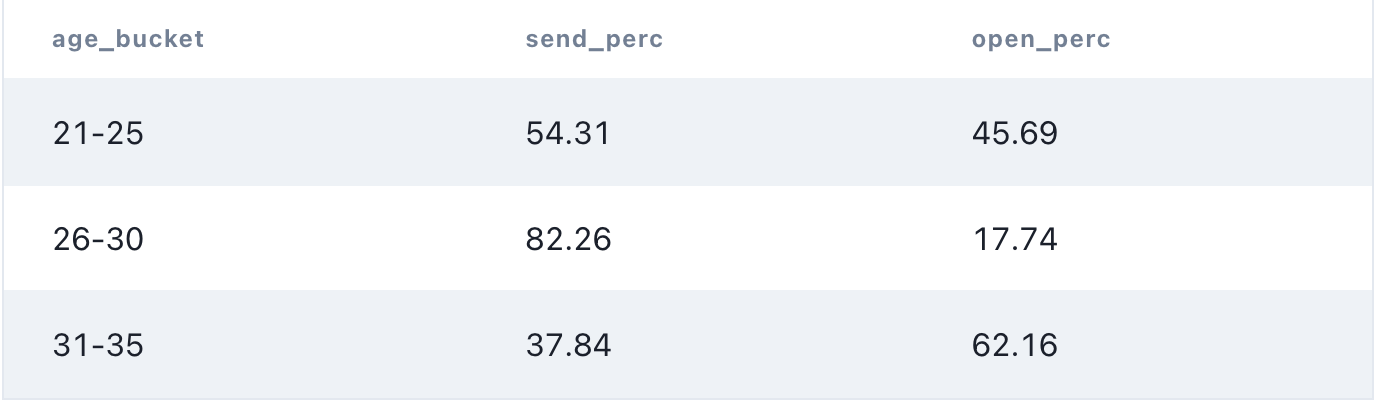

In [5]:
Image(filename='./resources/37.png')

***

### Microsoft | Mean, Median, Mode

[Question](https://datalemur.com/questions/mean-median-mode):<br>
You're given a list of numbers representing the number of emails in the inbox of Microsoft Outlook users. Before the Product Management team can start developing features related to bulk-deleting email or achieving inbox zero, they simply want to find the mean, median, and mode for the emails.

Display the output of mean, median and mode (in this order), with the mean rounded to the nearest integer. It should be assumed that there are no ties for the mode.

```sql
SELECT 
  ROUND(AVG(email_count)) "mean",
  PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY email_count) median,
  MODE() WITHIN GROUP (ORDER BY email_count) "mode"
FROM inbox_stats
```

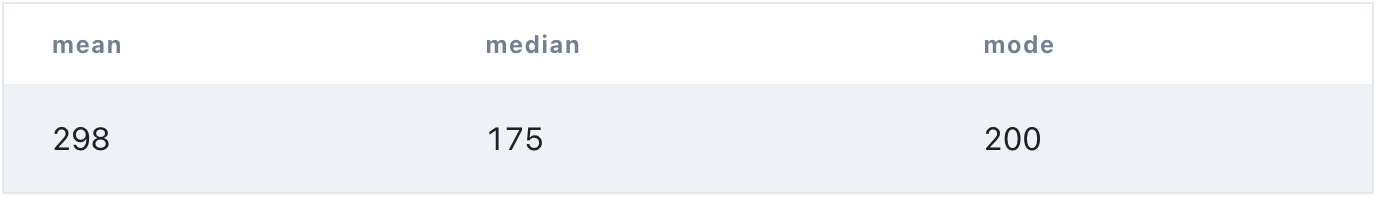

In [6]:
Image(filename='./resources/38.png')

***

### FAANG | Top Three Salaries

[Question](https://datalemur.com/questions/sql-top-three-salaries):<br>
As part of an ongoing analysis of salary distribution within the company, your manager has requested a report identifying high earners in each department. A 'high earner' within a department is defined as an employee with a salary ranking among the top three salaries within that department.

You're tasked with identifying these high earners across all departments. Write a query to display the employee's name along with their department name and salary. In case of duplicates, sort the results of department name in ascending order, then by salary in descending order. If multiple employees have the same salary, then order them alphabetically.

```sql
WITH ranked_salary_cte AS (

  SELECT
    department_name,
    name,
    salary,
    DENSE_RANK() OVER(PARTITION BY department_name ORDER BY salary DESC) salary_rank
  FROM
    employee
    JOIN
    department
    ON employee.department_id = department.department_id
)

SELECT 
  department_name,
  name,
  salary
FROM ranked_salary_cte 
WHERE salary_rank < 4
ORDER BY department_name, salary DESC, name;
```

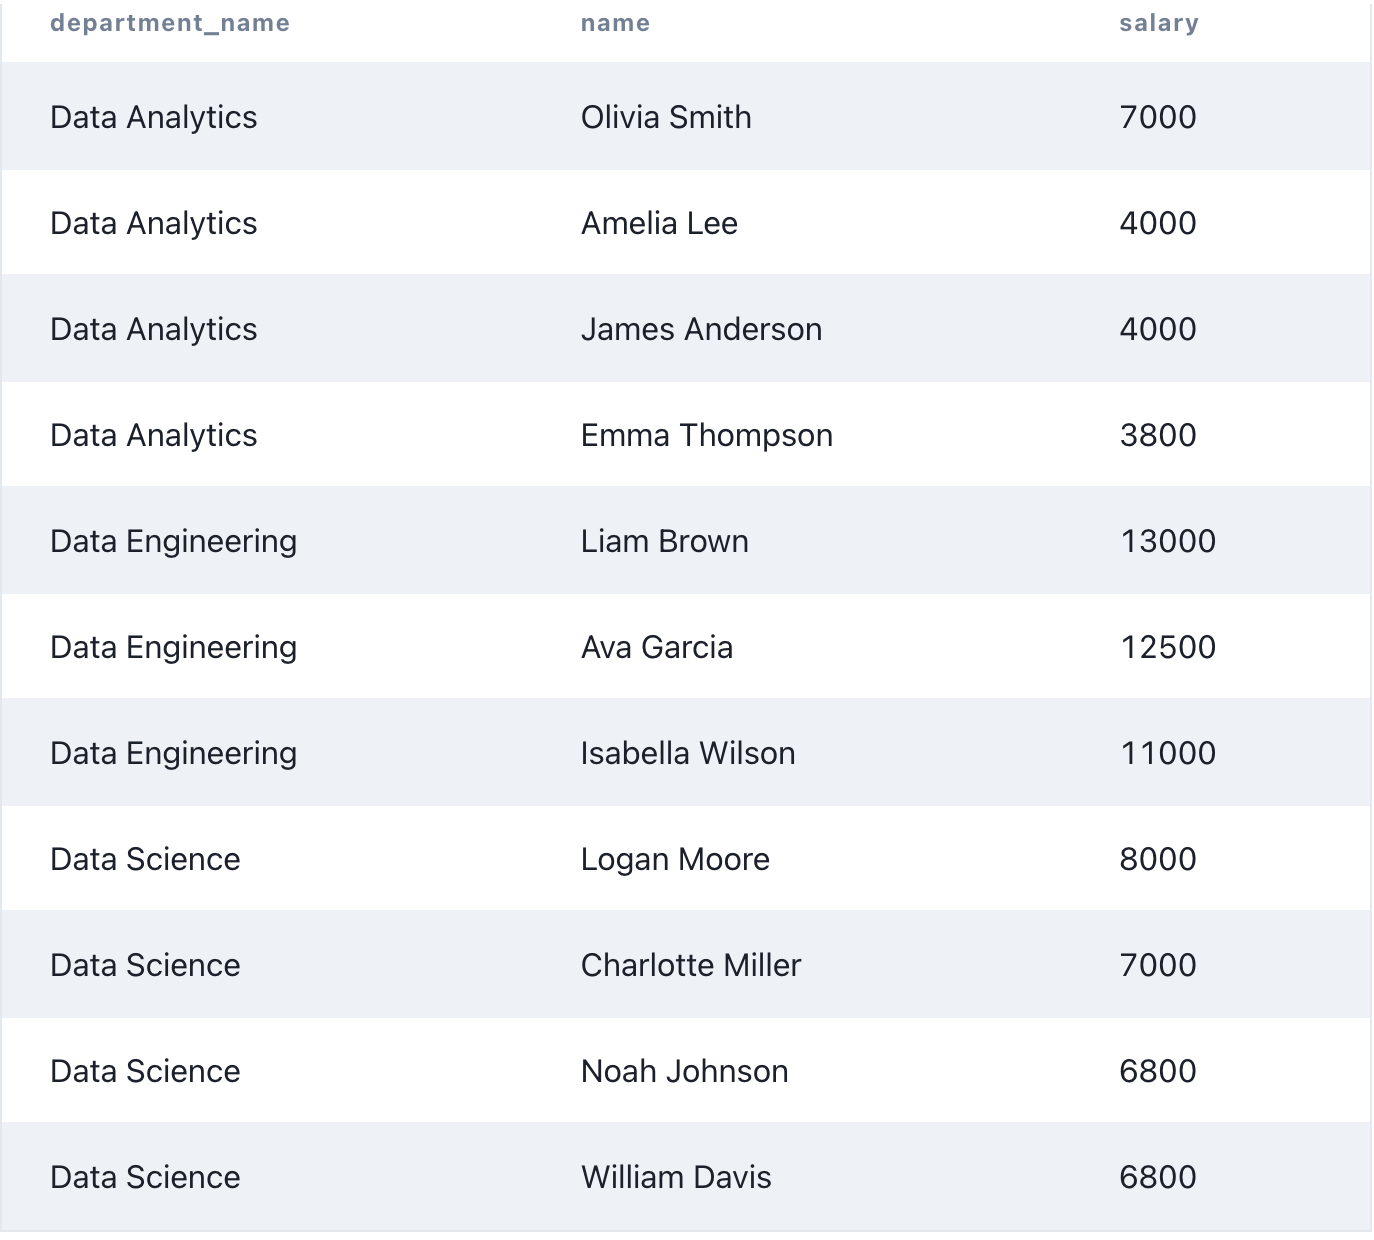

In [7]:
Image(filename='./resources/39.png')

***

### Amazon | Highest-Grossing Items

[Question](https://datalemur.com/questions/sql-highest-grossing):<br>
Assume you're given a table containing data on Amazon customers and their spending on products in different category, write a query to identify the top two highest-grossing products within each category in the year 2022. The output should include the category, product, and total spend.

```sql
WITH grouped_spendings AS ( 
  SELECT
    category,
    product,
    SUM(spend) total_spend
  FROM product_spend
  WHERE EXTRACT(YEAR FROM transaction_date) = 2022
  GROUP BY category,product
),
ranked_spendings AS (
  SELECT
    *,
    DENSE_RANK() OVER(PARTITION BY category ORDER BY total_spend DESC) ranked_total
  FROM grouped_spendings
)
SELECT 
  category,
  product,
  total_spend
FROM ranked_spendings
WHERE ranked_total <= 2
ORDER BY category, ranked_total; 
```

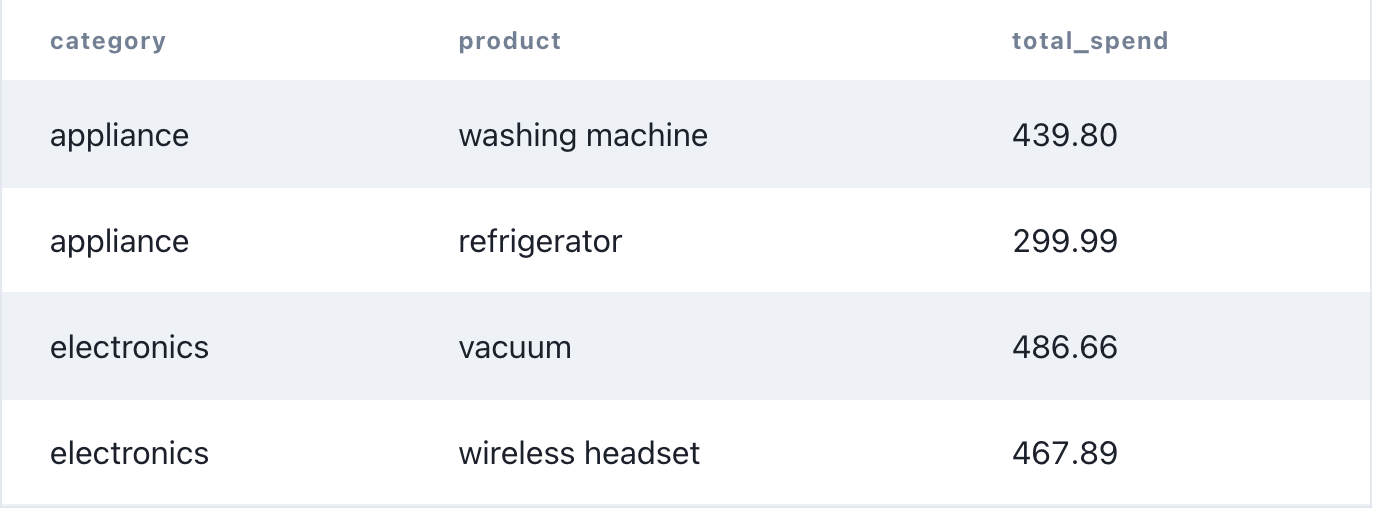

In [8]:
Image(filename='./resources/40.png')

***

### Zomato | Swapped Food Delivery

[Question](https://datalemur.com/questions/sql-swapped-food-delivery):<br>
Zomato is a leading online food delivery service that connects users with various restaurants and cuisines, allowing them to browse menus, place orders, and get meals delivered to their doorsteps.

Recently, Zomato encountered an issue with their delivery system. Due to an error in the delivery driver instructions, each item's order was swapped with the item in the subsequent row. As a data analyst, you're asked to correct this swapping error and return the proper pairing of order ID and item.

If the last item has an odd order ID, it should remain as the last item in the corrected data. For example, if the last item is Order ID 7 Tandoori Chicken, then it should remain as Order ID 7 in the corrected data.

In the results, return the correct pairs of order IDs and items.

```sql
SELECT 
  wrong_items.order_id AS corrected_order_id,
  -- takes care of last order if we have odd number of orders
  COALESCE(corrected_items.item,wrong_items.item) AS item
FROM 
  orders wrong_items
  LEFT JOIN
  orders corrected_items
  ON 
    CASE
    -- if we have a odd order if then correct order item is in the next row
    WHEN MOD(wrong_items.order_id,2) != 0 THEN wrong_items.order_id+1=corrected_items.order_id
    -- if we have a even order if then correct order item is in the previous row
    ELSE wrong_items.order_id-1 = corrected_items.order_id
    END 
```

In the above approach, we used self join and specific joining condition depending on if the order_id id odd or even. 
Instead of joining, we could use the same logic +1 order_id if odd and -1 order_id if even and modify the order_id's and deal with the edge case of the last order having a odd order_id. Then just order the whole table based on order_ids. The second approach will save a lot of time.

```sql
WITH cte_total_orders AS (
  SELECT COUNT(*) total_orders
  FROM orders
)

SELECT 
 CASE 
  WHEN MOD(order_id,2) != 0 AND order_id = total_orders THEN order_id -- edge case: last row has odd order_id
  WHEN MOD(order_id,2) != 0 THEN order_id + 1
  ELSE order_id - 1
 END AS corrected_order_id,
 item
FROM 
  orders
  CROSS JOIN
  cte_total_orders
ORDER BY corrected_order_id
```

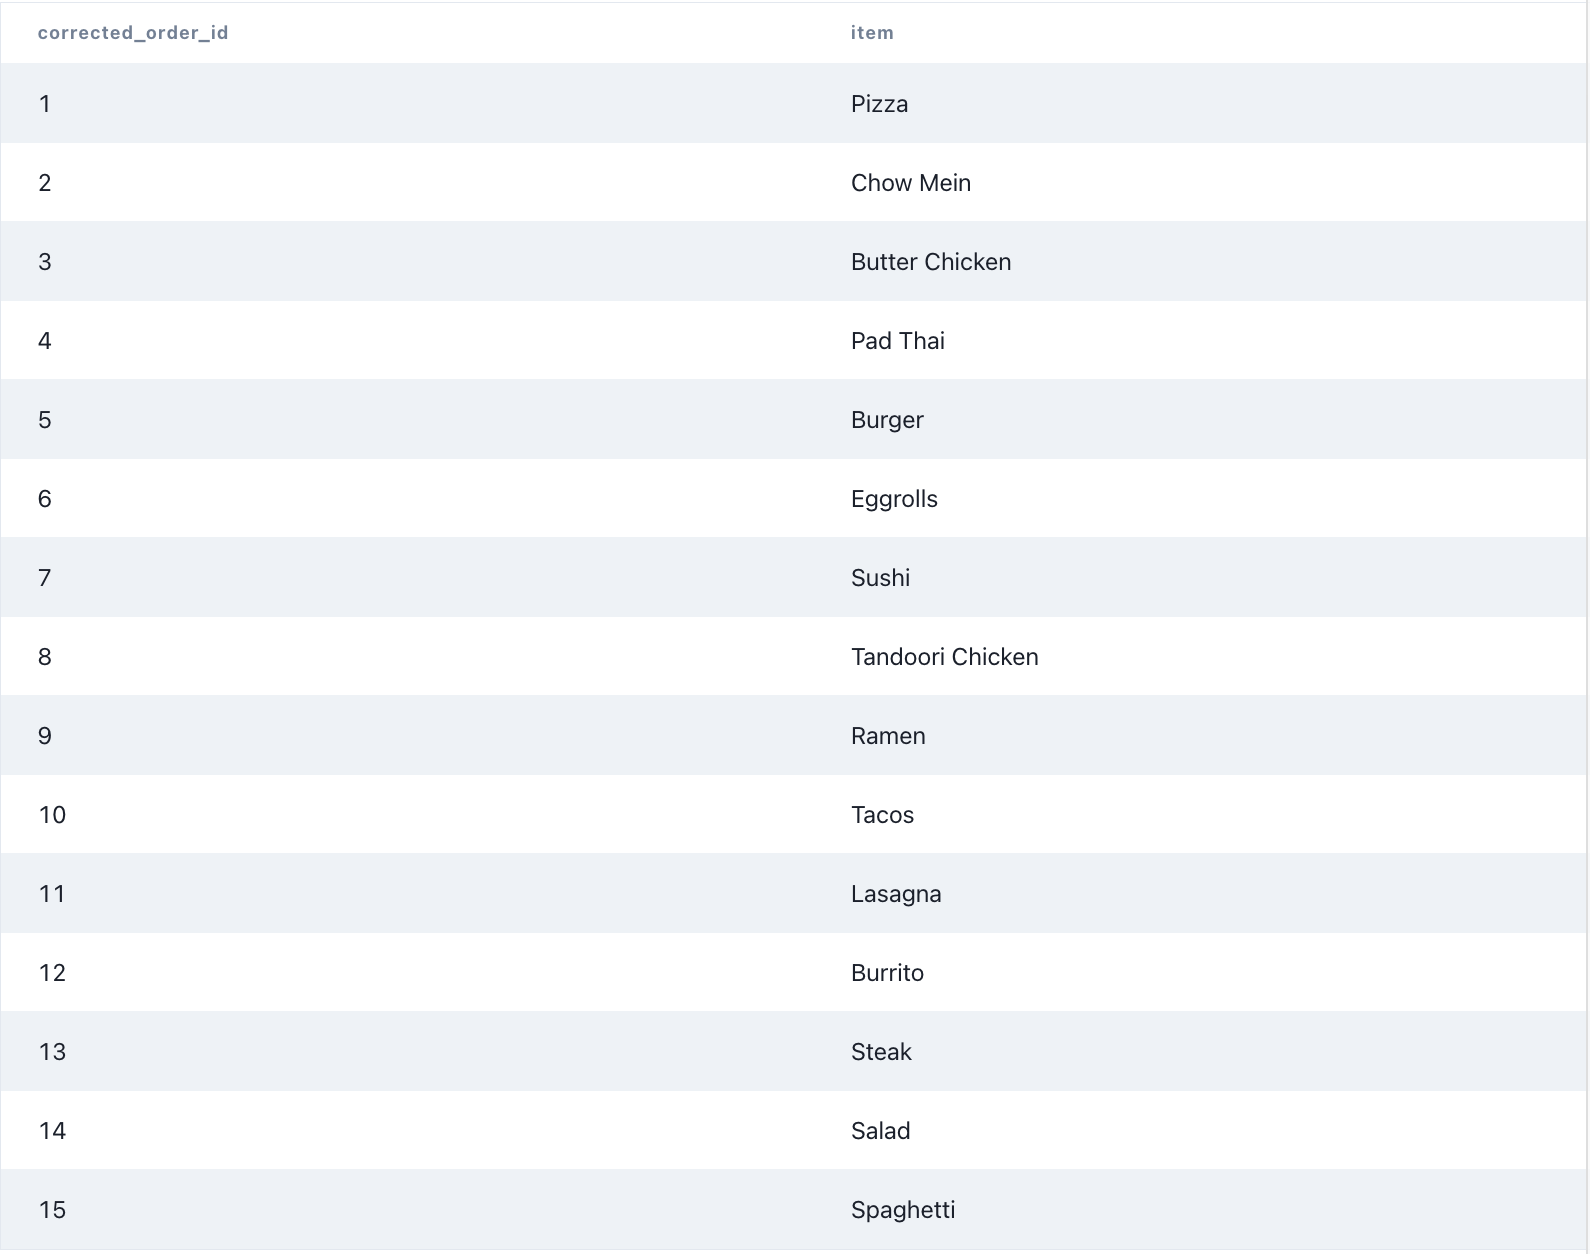

In [14]:
Image(filename='./resources/41.png')

***

### Twitter | Tweets' Rolling Averages

[Question](https://datalemur.com/questions/rolling-average-tweets):<br>
Given a table of tweet data over a specified time period, calculate the 3-day rolling average of tweets for each user. Output the user ID, tweet date, and rolling averages rounded to 2 decimal places.

```sql
SELECT
  user_id,
  tweet_date,
  ROUND(AVG(tweet_count) OVER(
                              PARTITION BY user_id 
                              ORDER BY tweet_date 
                              ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
                              )
  , 2) rolling_avg_3d
FROM tweets 
```

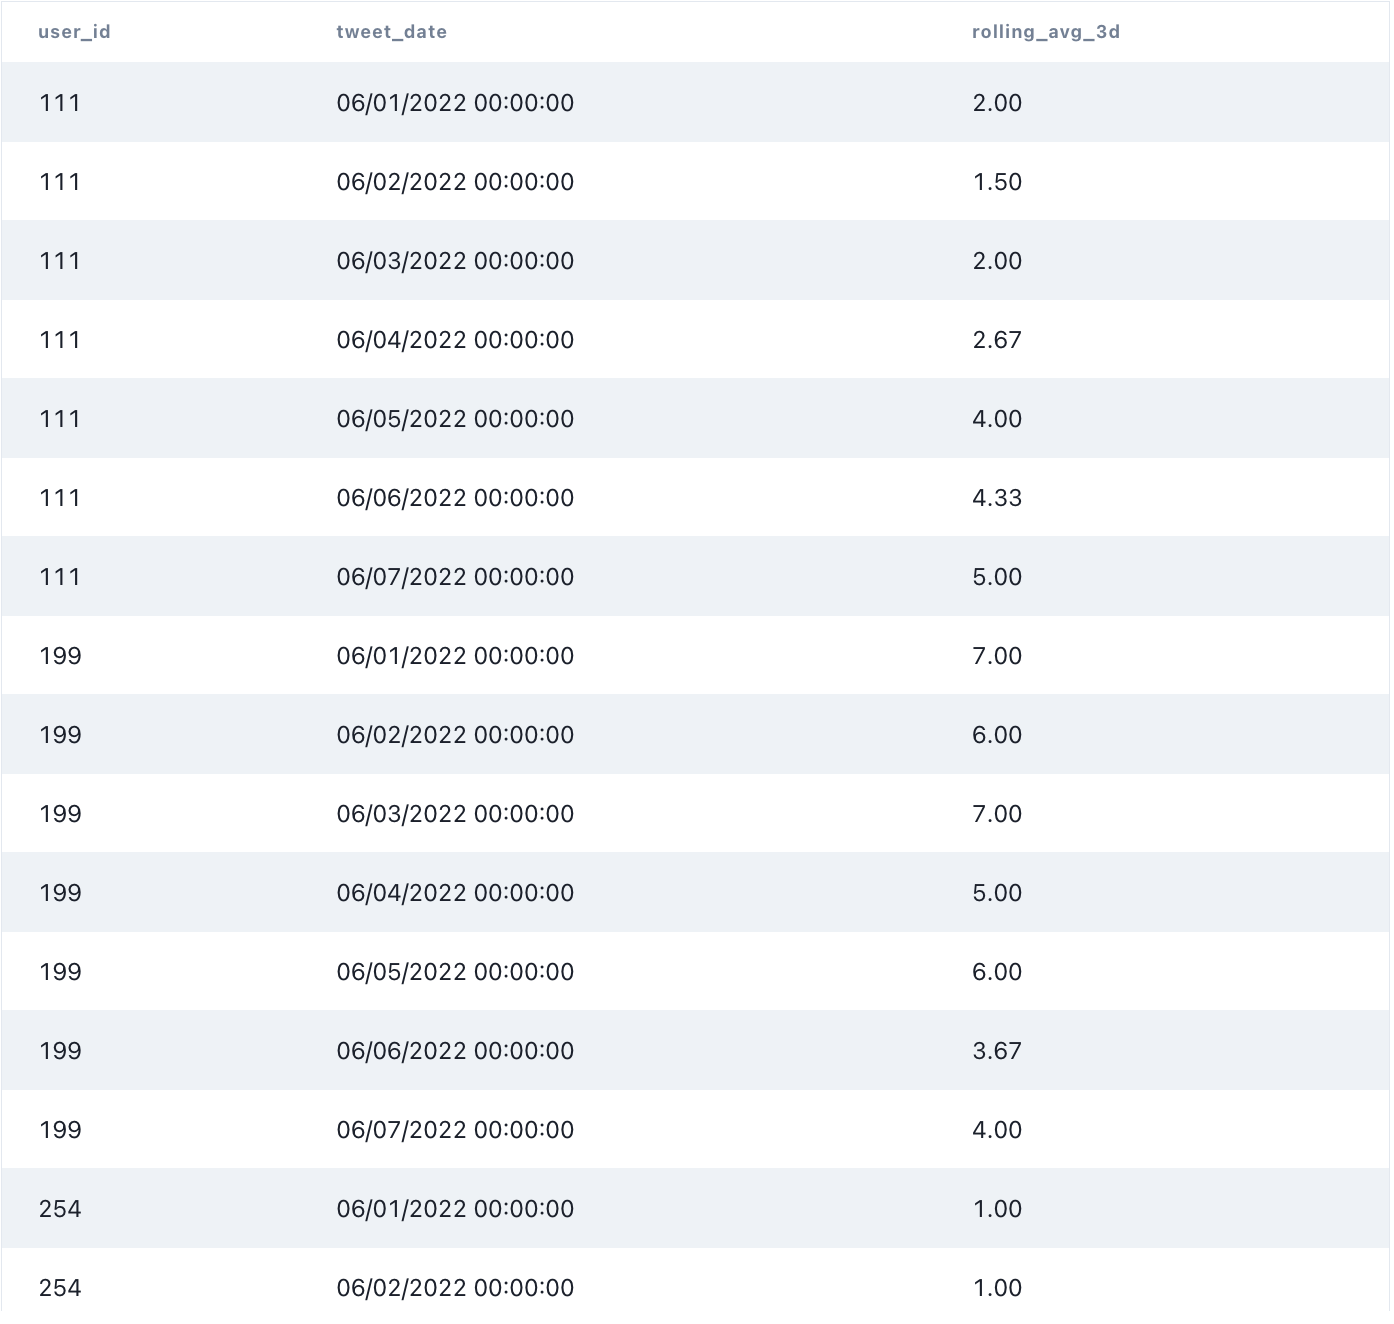

In [2]:
Image(filename='./resources/42.png')

***

### Spotify | Top 5 Artists

[Question](https://datalemur.com/questions/top-fans-rank):<br>
Assume there are three Spotify tables: artists, songs, and global_song_rank, which contain information about the artists, songs, and music charts, respectively.

Write a query to find the top 5 artists whose songs appear most frequently in the Top 10 of the global_song_rank table. Display the top 5 artist names in ascending order, along with their song appearance ranking.

If two or more artists have the same number of song appearances, they should be assigned the same ranking, and the rank numbers should be continuous (i.e. 1, 2, 2, 3, 4, 5).

```sql
SELECT artist_name, artist_rank
FROM (
  SELECT 
    a.artist_name,
    DENSE_RANK() OVER(ORDER BY COUNT(*) DESC) artist_rank -- this gives a rank based on the number of time each artist has appeared in the top 10 global rankings
  FROM -- merge 3 table together
    artists a
    JOIN
    songs s ON a.artist_id = s.artist_id
    JOIN
    global_song_rank g ON s.song_id = g.song_id
  WHERE g.rank <= 10 -- we are only interested in the top 10 global rankings
  GROUP BY a.artist_name 
) subquery
WHERE artist_rank <= 5 -- we are only interested in the top 5 artists
```

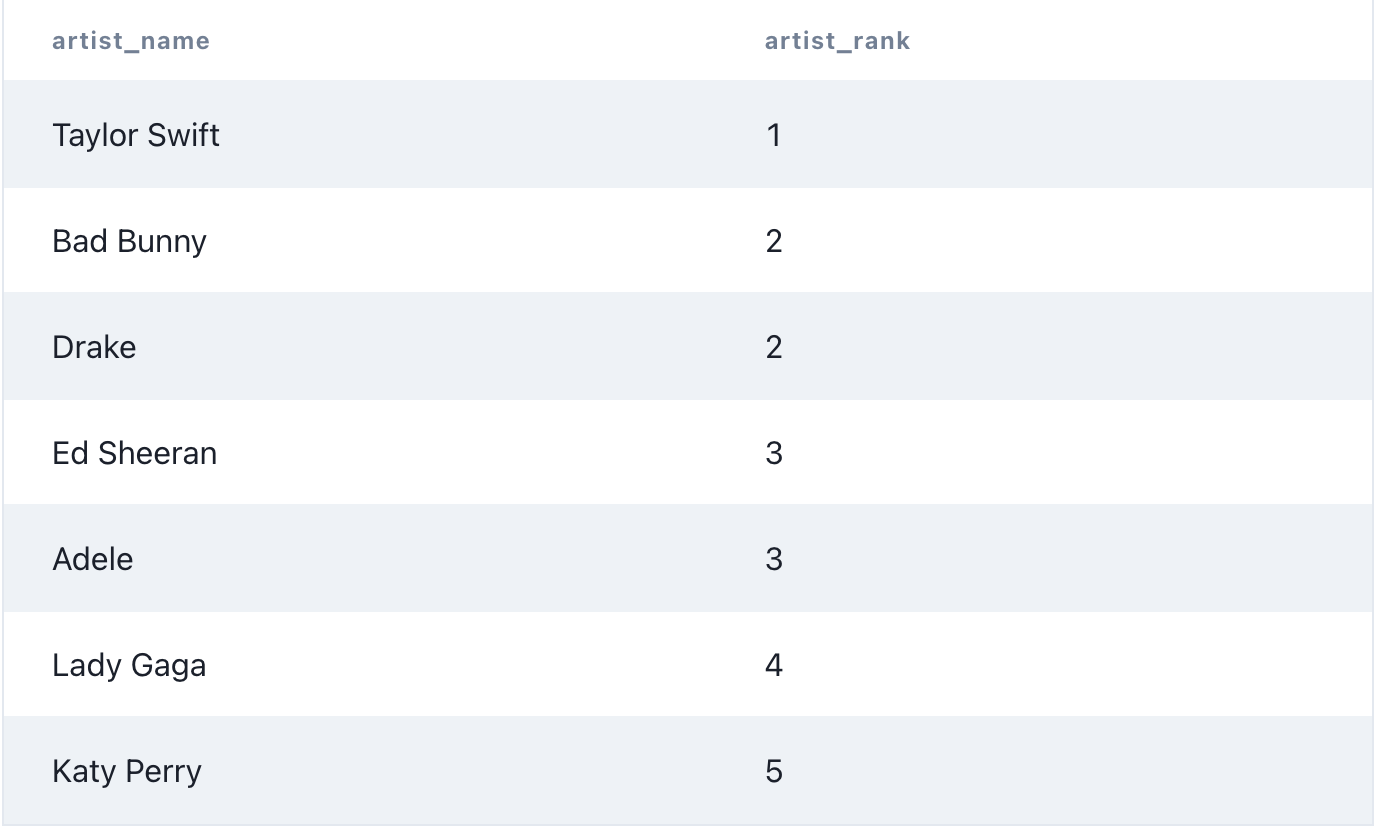

In [3]:
Image(filename='./resources/43.png')

***

### Google | Odd and Even Measurements

[Question](https://datalemur.com/questions/odd-even-measurements):<br>
Assume you're given a table with measurement values obtained from a Google sensor over multiple days with measurements taken multiple times within each day.

Write a query to calculate the sum of odd-numbered and even-numbered measurements separately for a particular day and display the results in two different columns.

Definition:
- Within a day, measurements taken at 1st, 3rd, and 5th times are considered odd-numbered measurements, and measurements taken at 2nd, 4th, and 6th times are considered even-numbered measurements.

```sql
WITH cte_ranked_measurements AS (
  SELECT 
    DATE_TRUNC('DAY',measurement_time) measurement_day,
    measurement_value,
    ROW_NUMBER() OVER(PARTITION BY DATE_TRUNC('DAY',measurement_time) ORDER BY measurement_time) measurement_num
  FROM measurements
)

SELECT
  measurement_day,
  SUM(measurement_value) FILTER (WHERE measurement_num % 2 != 0) odd_sum,
  SUM(measurement_value) FILTER (WHERE measurement_num % 2 = 0) even_sum
FROM cte_ranked_measurements
GROUP BY measurement_day;
```

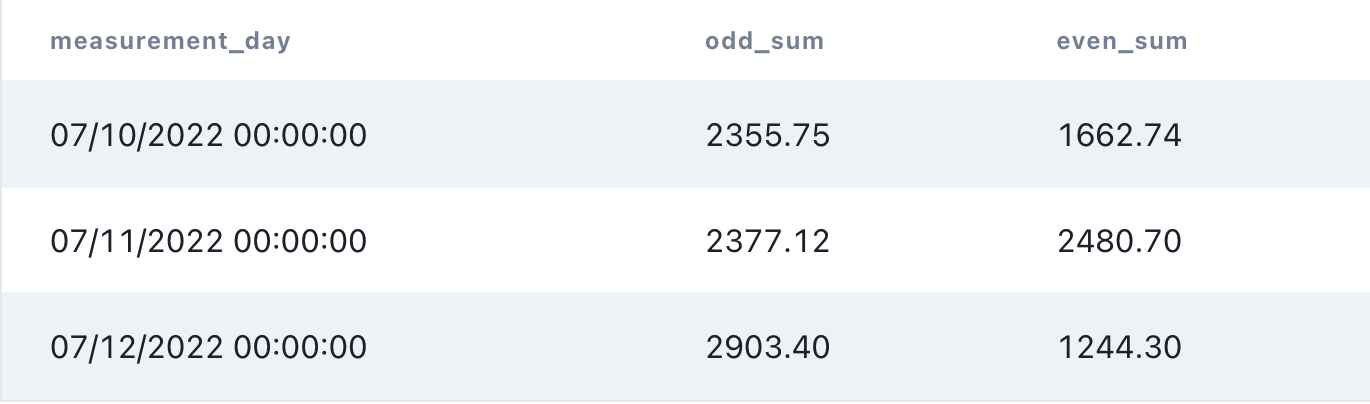

In [4]:
Image(filename='./resources/44.png')

***

### Accenture | Fill Missing Client Data

[Question](https://datalemur.com/questions/fill-missing-product):<br>
When accessing Accenture's retailer client's database, you observe that the category column in products table contains null values.

Write a query that returns the updated product table with all the category values filled in, taking into consideration the assumption that the first product in each category will always have a defined category value.

Assumptions:
- Each category is expected to be listed only once in the column and products within the same category should be grouped together based on sequential product IDs.
  
- The first product in each category will always have a defined category value.

In [6]:
'''
e.g.
-----------------------------
   product_id | category
-----------------------------
        1        Shoes
        2        NULL
        3        NULL
        4        NULL
        5        NULL
        6        Jeans
        7        NULL
        8        NULL
        9        NULL
        10       Shirts
        11       NULL
'''
print()

```sql
SELECT
  product_id,
  CASE
    WHEN category IS NULL THEN (SELECT category 
                                FROM products p2 
                                WHERE 
                                  p2.product_id < p1.product_id
                                  AND
                                  p2.category IS NOT NULL
                                ORDER BY p2.product_id DESC
                                LIMIT 1
                                )
    ELSE category
  END category,
  name
FROM products p1
```

**Approach Used:** Correlated Subquery

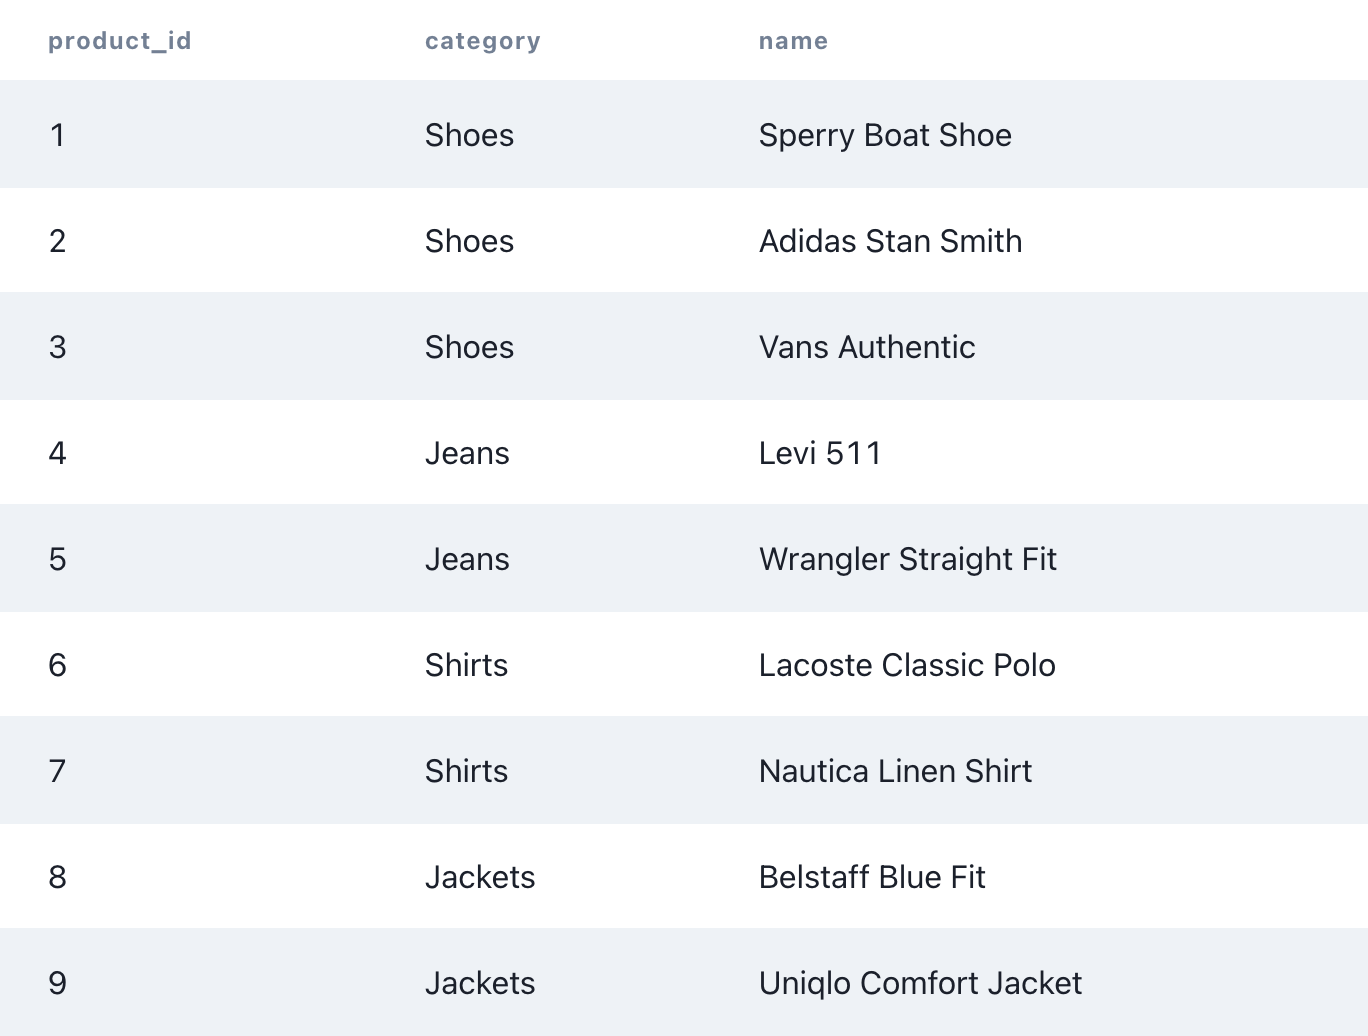

In [9]:
Image(filename='./resources/45.png')

***

### TikTok | Signup Activation Rate

[Question](https://datalemur.com/questions/signup-confirmation-rate):<br>
New TikTok users sign up with their emails. They confirmed their signup by replying to the text confirmation to activate their accounts. Users may receive multiple text messages for account confirmation until they have confirmed their new account.

A senior analyst is interested to know the activation rate of specified users in the emails table. Write a query to find the activation rate. Round the percentage to 2 decimal places.

Definitions:

- emails table contain the information of user signup details.
- texts table contains the users' activation information.
  
Assumptions:

- The analyst is interested in the activation rate of specific users in the emails table, which may not include all users that could potentially be found in the texts table.
- For example, user 123 in the emails table may not be in the texts table and vice versa.

```sql
SELECT
  ROUND(
    COUNT(DISTINCT user_id) FILTER (WHERE LOWER(signup_action)='confirmed')::NUMERIC 
    / COUNT(DISTINCT user_id), 2
  ) confirm_rate
FROM 
  emails e
  LEFT JOIN
  texts t ON e.email_id = t.email_id
```

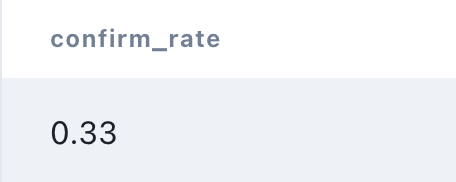

In [3]:
Image(filename='./resources/46.png')

***

### Microsoft | Supercloud Customer

[Question](https://datalemur.com/questions/supercloud-customer):<br>
A Microsoft Azure Supercloud customer is defined as a customer who has purchased at least one product from every product category listed in the products table.

Write a query that identifies the customer IDs of these Supercloud customers.

```sql
WITH unique_categories AS (
  SELECT COUNT(DISTINCT product_category) num_categories
  FROM products
)
SELECT 
  customer_id
FROM 
  customer_contracts cc
  JOIN
  products p
  ON cc.product_id = p.product_id
GROUP BY 1
HAVING COUNT(DISTINCT product_category) = (SELECT num_categories FROM unique_categories);
```

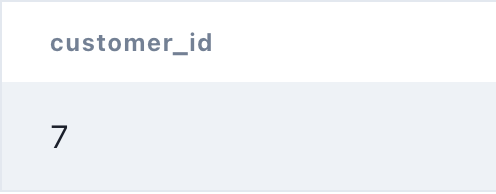

In [4]:
Image(filename='./resources/47.png')

***

### Alibaba | Compressed Mode

[Question](https://datalemur.com/questions/alibaba-compressed-mode):<br>
You're given a table containing the item count for each order on Alibaba, along with the frequency of orders that have the same item count. Write a query to retrieve the mode of the order occurrences. Additionally, if there are multiple item counts with the same mode, the results should be sorted in ascending order.

```sql
SELECT 
  item_count AS "mode"
FROM items_per_order
WHERE order_occurrences = (SELECT MAX(order_occurrences) FROM items_per_order)
ORDER BY 1 ASC;
```

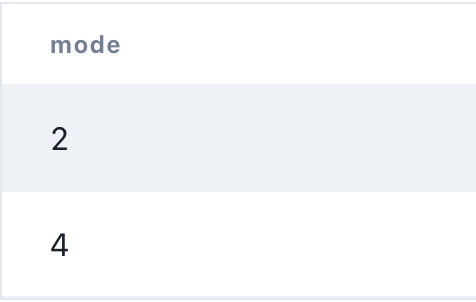

In [5]:
Image(filename='./resources/48.png')

***

### Walmart | Histogram of Users and Purchases 

[Question](https://datalemur.com/questions/histogram-users-purchases):<br>
Assume you're given a table on Walmart user transactions. Based on their most recent transaction date, write a query that retrieve the users along with the number of products they bought.

Output the user's most recent transaction date, user ID, and the number of products, sorted in chronological order by the transaction date.

```sql
WITH recent_transactions AS (
  
  SELECT
    product_id,
    user_id,
    transaction_date,
    DENSE_RANK() OVER(PARTITION BY user_id ORDER BY transaction_date DESC) transaction_num
  FROM user_transactions

)
SELECT 
  transaction_date,
  user_id,
  COUNT(*) purchase_count
FROM recent_transactions 
WHERE transaction_num = 1
GROUP BY user_id, transaction_date
ORDER BY 1;
```

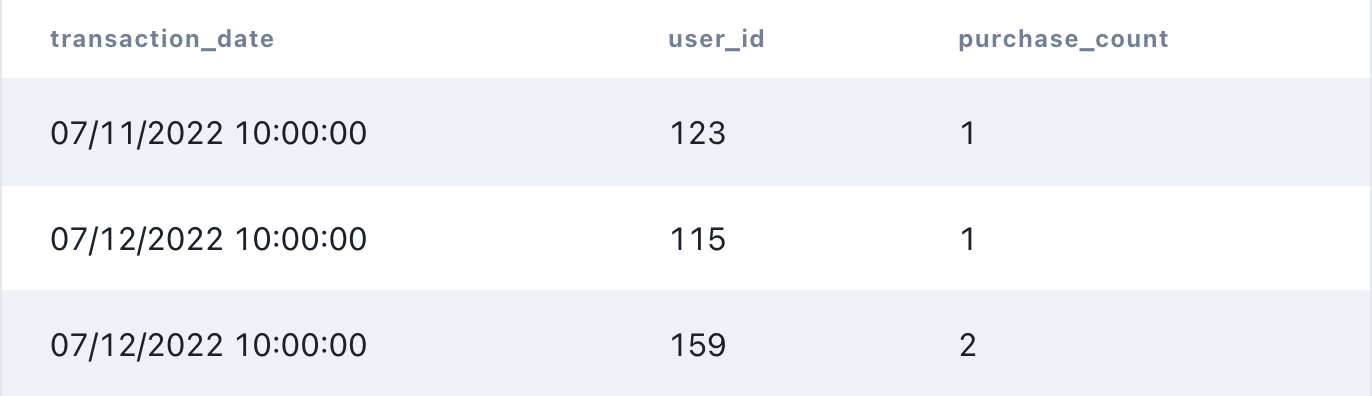

In [6]:
Image(filename='./resources/49.png')

***

### Spotify | Spotify Streaming History

[Question](https://datalemur.com/questions/spotify-streaming-history):<br>
You're given two tables containing data on Spotify users' streaming activity: songs_history which has historical streaming data, and songs_weekly which has data from the current week.

Write a query that outputs the user ID, song ID, and cumulative count of song plays up to August 4th, 2022, sorted in descending order.

Assume that there may be new users or songs in the songs_weekly table that are not present in the songs_history table.

Definitions:
- song_weeklytable only contains data for the week of August 1st to August 7th, 2022.
- songs_history table contains data up to July 31st, 2022. The query should include historical data from this table.

```sql
WITH current_week_counts AS (
  SELECT 
    user_id,
    song_id,
    COUNT(*) AS song_plays
  FROM songs_weekly 
  WHERE listen_time < '08/05/2022'::DATE
  GROUP BY user_id, song_id
)

SELECT
  COALESCE(t1.user_id, t2.user_id) AS user_id,
  COALESCE(t1.song_id, t2.song_id) AS song_id,
  COALESCE(t1.song_plays+t2.song_plays, t1.song_plays, t2.song_plays) AS song_plays
FROM
  songs_history t1
  FULL OUTER JOIN
  current_week_counts t2
  ON
    t1.user_id = t2.user_id
    AND
    t1.song_id = t2.song_id
ORDER BY song_plays DESC;
```

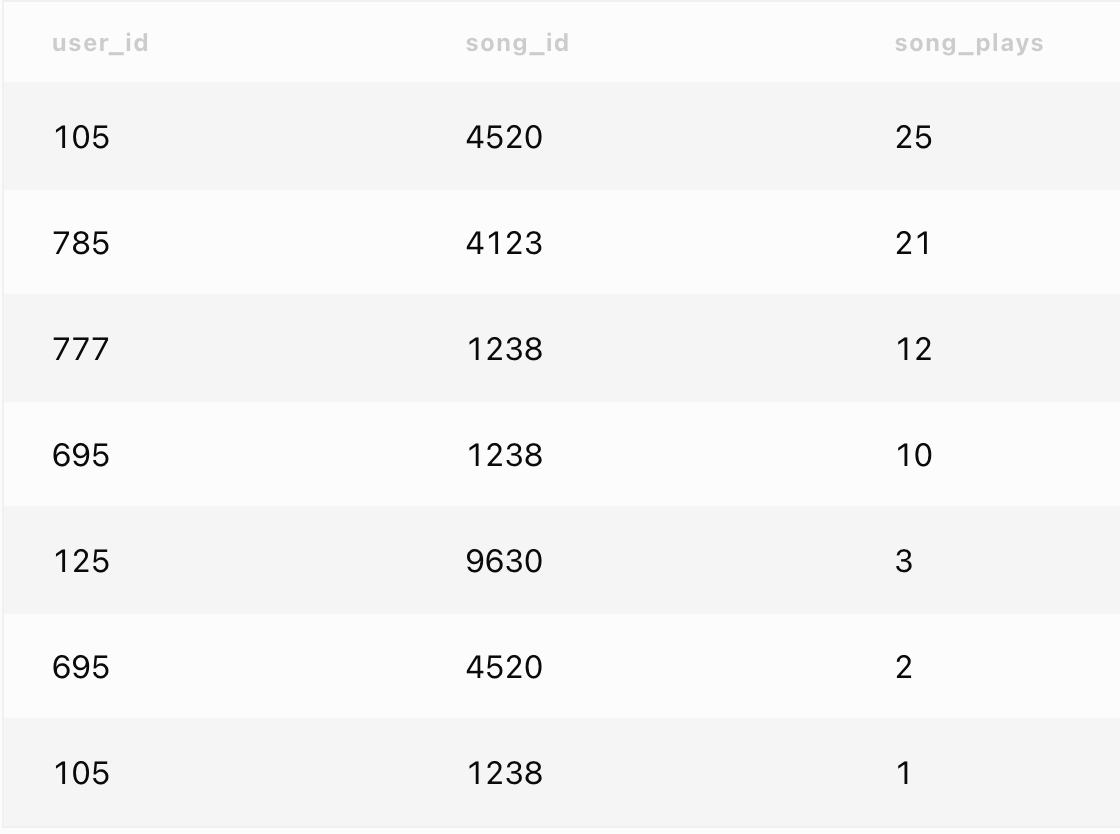

In [6]:
Image(filename='./resources/50.png', width=500)

***

### CVS Health | Pharmacy Analytics (Part 4)

[Question](https://datalemur.com/questions/top-drugs-sold):<br>
CVS Health is trying to better understand its pharmacy sales, and how well different drugs are selling.

Write a query to find the top 2 drugs sold, in terms of units sold, for each manufacturer. List your results in alphabetical order by manufacturer.

```sql
WITH ranked_drugs AS (
  SELECT 
    manufacturer,
    drug,
    units_sold,
    ROW_NUMBER() OVER(PARTITION BY manufacturer ORDER BY units_sold DESC) AS drug_rank
  FROM
    pharmacy_sales
  
)

SELECT 
  manufacturer,
  drug AS top_drugs
FROM ranked_drugs
WHERE drug_rank < 3
ORDER BY manufacturer;
```

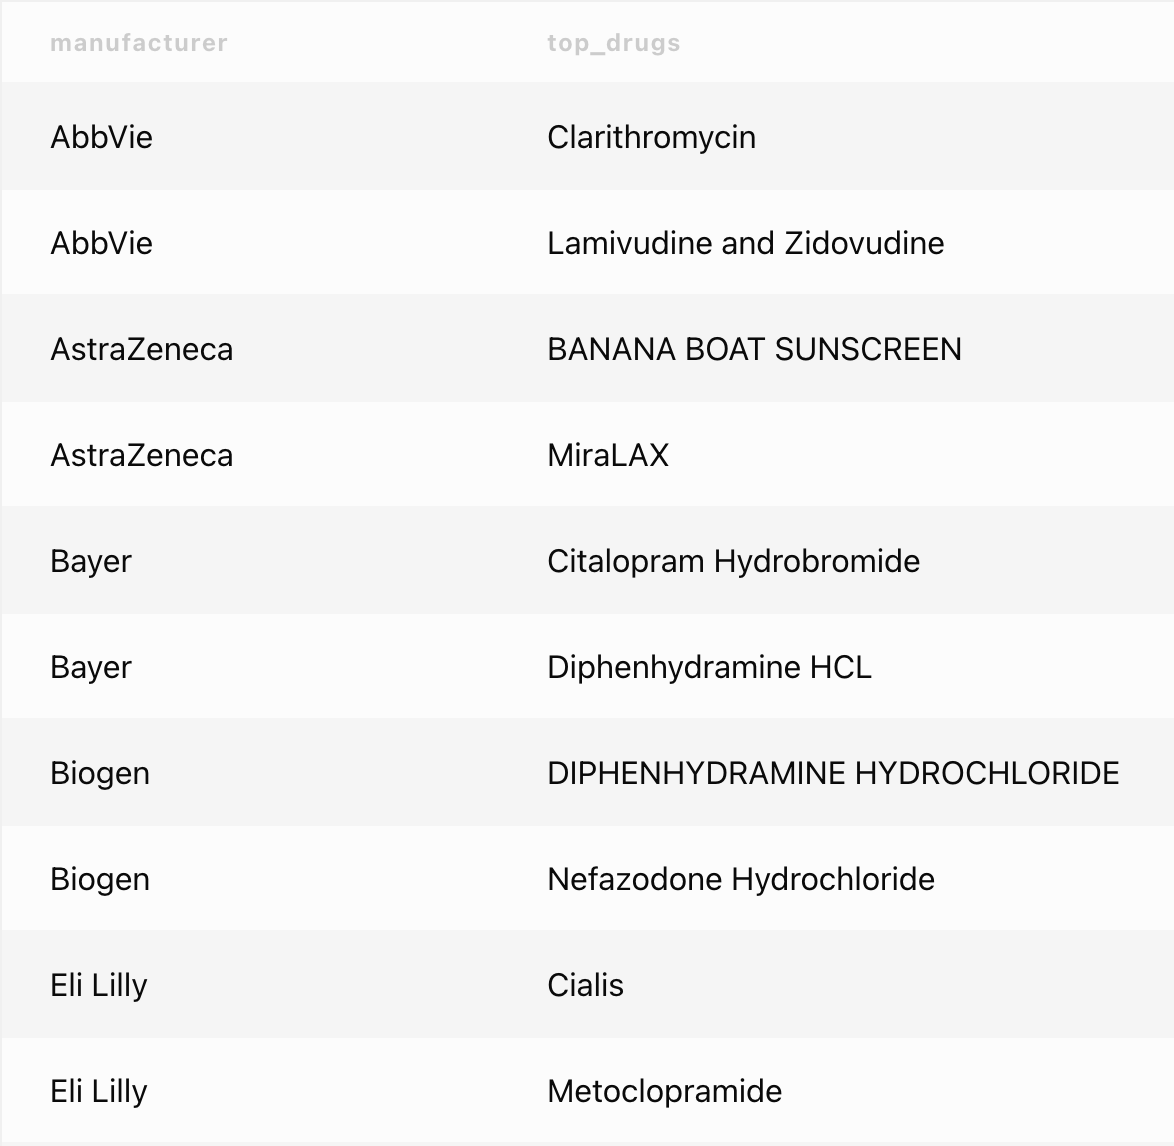

In [9]:
Image(filename='./resources/51.png', width=500)

***

### Walmart | Frequently Purchased Pairs

[Question](https://datalemur.com/questions/frequently-purchased-pairs):<br>
Given the Walmart transaction and product tables, write a query to determine the count of unique product combinations that are purchased together in the same transaction, considering that there must be a minimum of two products in the transaction. Display the output in ascending order of the product combinations.

```sql
SELECT
  DISTINCT combination
FROM (
  SELECT
    transaction_id,
    ARRAY_AGG(product_id ORDER BY product_id) AS combination
  FROM transactions
  GROUP by transaction_id
) AS subquery
WHERE ARRAY_LENGTH(combination, 1) > 1
ORDER BY combination;
```

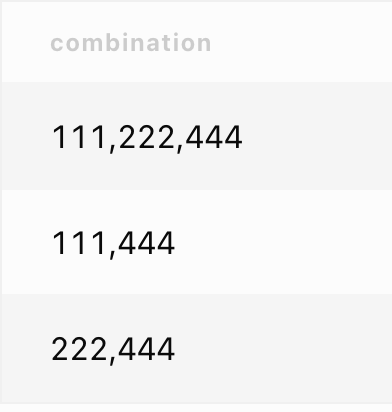

In [12]:
Image(filename='./resources/52.png', width=200)

***

### Bloomberg | FAANG Stock Min-Max (Part 1)

[Question](https://datalemur.com/questions/sql-bloomberg-stock-min-max-1):<br>
The Bloomberg terminal is the go-to resource for financial professionals, offering convenient access to a wide array of financial datasets. As a Data Analyst at Bloomberg, you have access to historical data on stock performance.

Currently, you're analyzing the highest and lowest open prices for each FAANG stock by month over the years.

For each FAANG stock, display the ticker symbol, the month and year ('Mon-YYYY') with the corresponding highest and lowest open prices (refer to the Example Output format). Ensure that the results are sorted by ticker symbol.

```sql
WITH cte_highest AS (
  SELECT * FROM (
    SELECT 
      ticker,
      TO_CHAR(date, 'Mon-YYYY') AS highest_mth,
      MAX(open) AS highest_open,
      ROW_NUMBER() OVER(PARTITION BY ticker ORDER BY MAX(open) DESC) mth_rank
    FROM stock_prices
    GROUP BY ticker, TO_CHAR(date, 'Mon-YYYY')
  ) AS subquery
  WHERE mth_rank = 1
),
cte_lowest AS (
  SELECT * FROM (
    SELECT 
      ticker,
      TO_CHAR(date, 'Mon-YYYY') AS lowest_mth,
      MIN(open) AS lowest_open,
      ROW_NUMBER() OVER(PARTITION BY ticker ORDER BY MIN(open)) mth_rank
    FROM stock_prices
    GROUP BY ticker, TO_CHAR(date, 'Mon-YYYY')
  ) AS subquery
  WHERE mth_rank = 1
)

SELECT
  cte_highest.ticker,
  cte_highest.highest_mth,
  cte_highest.highest_open,
  cte_lowest.lowest_mth,
  cte_lowest.lowest_open
FROM cte_highest
  INNER JOIN cte_lowest ON cte_highest.ticker = cte_lowest.ticker
ORDER BY ticker;
```

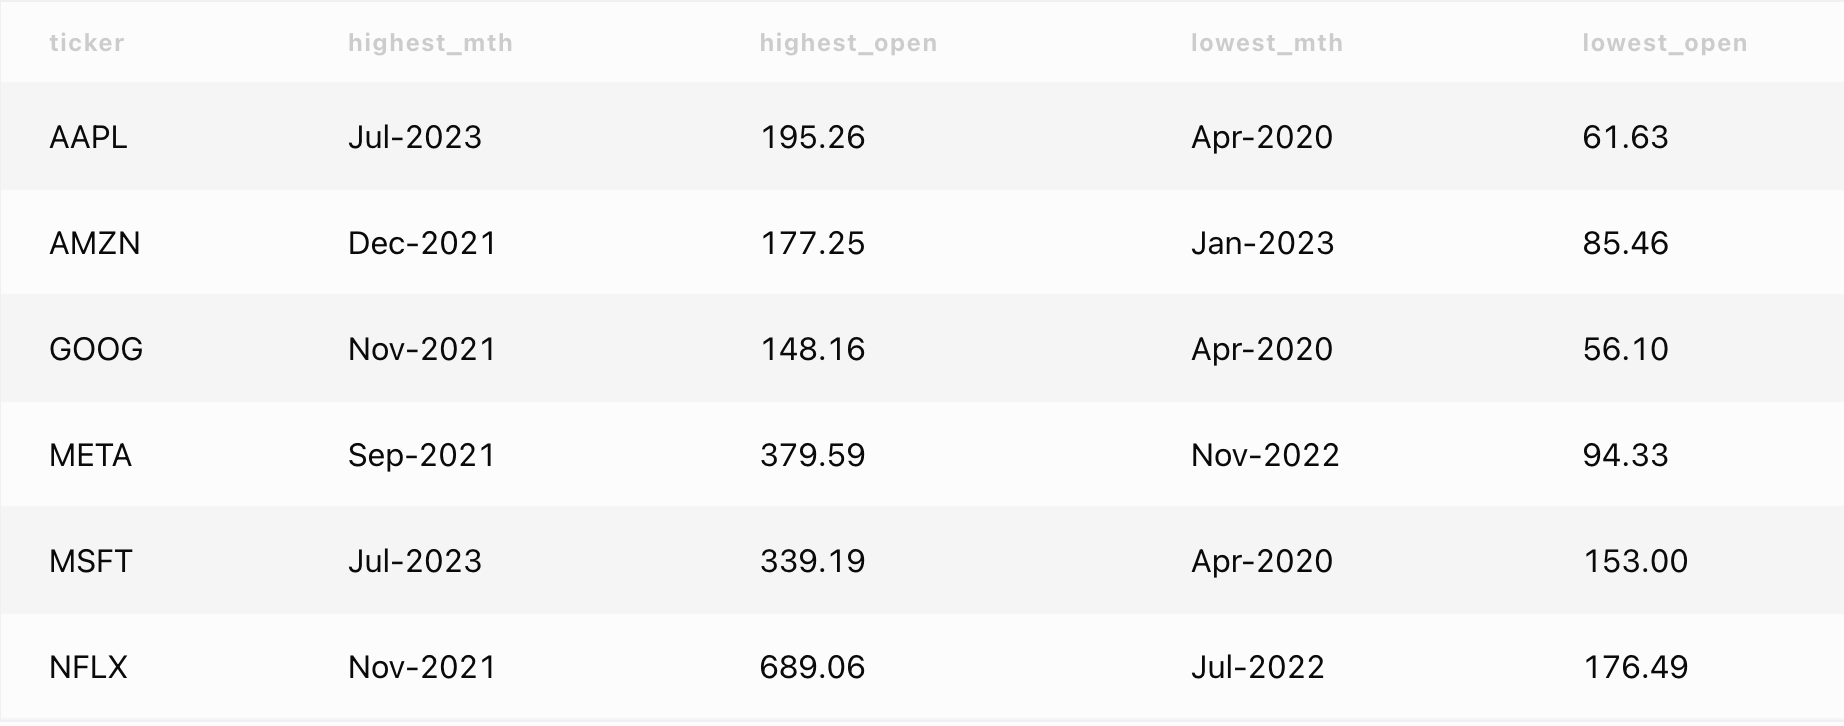

In [3]:
Image(filename='./resources/53.png')

***

### JPMorgan Chase | Card Launch Success

[Question](https://datalemur.com/questions/card-launch-success):<br>
Your team at JPMorgan Chase is soon launching a new credit card. You are asked to estimate how many cards you'll issue in the first month.

Before you can answer this question, you want to first get some perspective on how well new credit card launches typically do in their first month.

Write a query that outputs the name of the credit card, and how many cards were issued in its launch month. The launch month is the earliest record in the monthly_cards_issued table for a given card. Order the results starting from the biggest issued amount.

```sql
SELECT
  card_name,
  issued_amount
FROM (
  SELECT 
    card_name,
    issued_amount,
    ROW_NUMBER() OVER(PARTITION BY card_name
                      ORDER BY issue_year, issue_month) AS launch_mth_rank
  FROM monthly_cards_issued) AS subquery
WHERE launch_mth_rank = 1
ORDER BY issued_amount DESC;
```

**Useful Functions**: 
- make_date(year, month, day)
- concat()

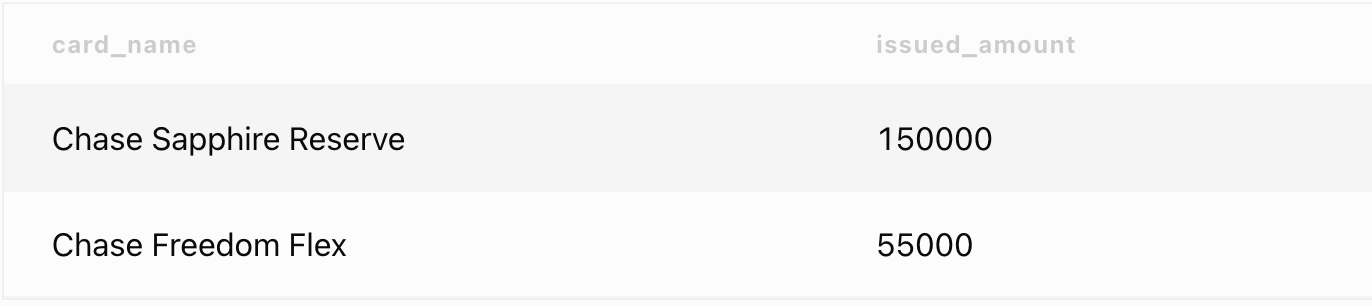

In [4]:
Image(filename='./resources/54.png')

***

### Verizon | International Call Percentage

[Question](https://datalemur.com/questions/international-call-percentage):<br>
A phone call is considered an international call when the person calling is in a different country than the person receiving the call.

What percentage of phone calls are international? Round the result to 1 decimal.

Assumption:
- The caller_id in phone_info table refers to both the caller and receiver.

```sql
SELECT
  ROUND(100 * 
        COUNT(*) FILTER(WHERE caller.country_id <> receiver.country_id)::NUMERIC 
        / COUNT(*), 1) AS international_calls_pct
FROM phone_calls AS base
  INNER JOIN phone_info AS caller ON base.caller_id = caller.caller_id
  INNER JOIN phone_info AS receiver ON base.receiver_id = receiver.caller_id;
```

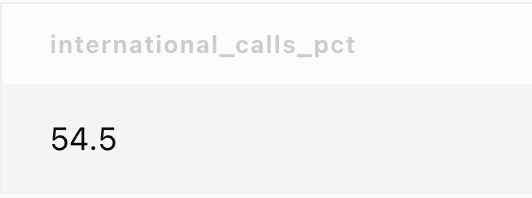

In [5]:
Image(filename='./resources/55.png')

***

### UnitedHealth | Patient Support Analysis (Part 2)

[Question](https://datalemur.com/questions/uncategorized-calls-percentage):<br>
UnitedHealth Group (UHG) has a program called Advocate4Me, which allows policy holders (or, members) to call an advocate and receive support for their health care needs – whether that's claims and benefits support, drug coverage, pre- and post-authorisation, medical records, emergency assistance, or member portal services.

Calls to the Advocate4Me call centre are classified into various categories, but some calls cannot be neatly categorised. These uncategorised calls are labeled as “n/a”, or are left empty when the support agent does not enter anything into the call category field.

Write a query to calculate the percentage of calls that cannot be categorised. Round your answer to 1 decimal place."

```sql
SELECT  
  ROUND(100 * COUNT(*) FILTER (WHERE call_category = 'n/a' OR
                         call_category IS NULL)::NUMERIC
        / COUNT(*), 1) AS uncategorised_call_pct
FROM callers;
```

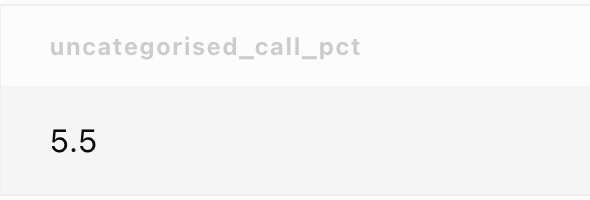

In [6]:
Image(filename='./resources/56.png')

***

### Google | Invalid Search Results

[Question](https://datalemur.com/questions/invalid-search-pct):<br>
Assume you are given the table below containing the information on the searches attempted and the percentage of invalid searches by country. Write a query to obtain the percentage of invalid searches.

Output the country in ascending order, total searches and overall percentage of invalid searches rounded to 2 decimal places.

```sql
WITH cleaned_search_insights AS (
  SELECT *
  FROM search_category
  WHERE num_search IS NOT NULL AND
        invalid_result_pct IS NOT NULL
)
SELECT
  country,
  SUM(num_search) AS total_search,
  ROUND(100.0*SUM(num_search*(invalid_result_pct/100.0)) / SUM(num_search), 2) AS invalid_search_pct
FROM cleaned_search_insights
GROUP BY country
ORDER BY country, total_search, invalid_search_pct;
```

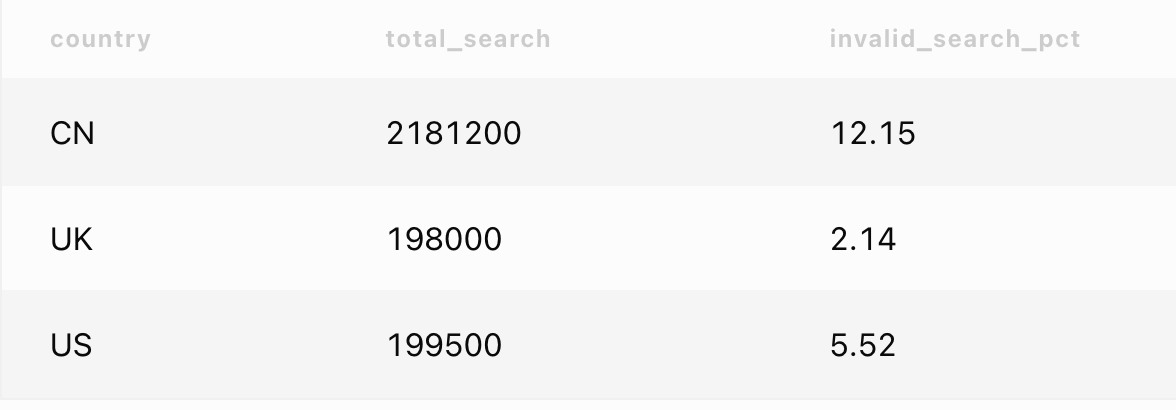

In [7]:
Image(filename='./resources/57.png')

***

### Facebook | Email Table Transformation

Found this question a bit challenging, I was using SUM instead of MAX. Simple mistake but need more practice.

[Question](https://datalemur.com/questions/email-table-transformation):<br>
Each Facebook user can designate a personal email address, a business email address, and a recovery email address.

Unfortunately, the table is currently in the wrong format, so you need to transform its structure to show the following columns (see example output): user id, personal email, business email, and recovery email. Sort your answer by user id in ascending order.

```sql
SELECT
  user_id,
  MAX(CASE
    WHEN email_type LIKE 'personal' THEN email
    ELSE NULL
  END) AS personal,
  MAX(CASE
    WHEN email_type LIKE 'business' THEN email
    ELSE NULL
  END) AS business,
  MAX(CASE
    WHEN email_type LIKE 'recovery' THEN email
    ELSE NULL
  END) AS recovery
FROM users
GROUP BY user_id
ORDER BY user_id;
```

```sql
SELECT
  user_id,
  MAX(email) FILTER(WHERE email_type = 'personal') AS personal,
  MAX(email) FILTER(WHERE email_type = 'business') AS business,
  MAX(email) FILTER(WHERE email_type = 'recovery') AS recovery
FROM users
GROUP BY user_id
ORDER BY user_id;
```

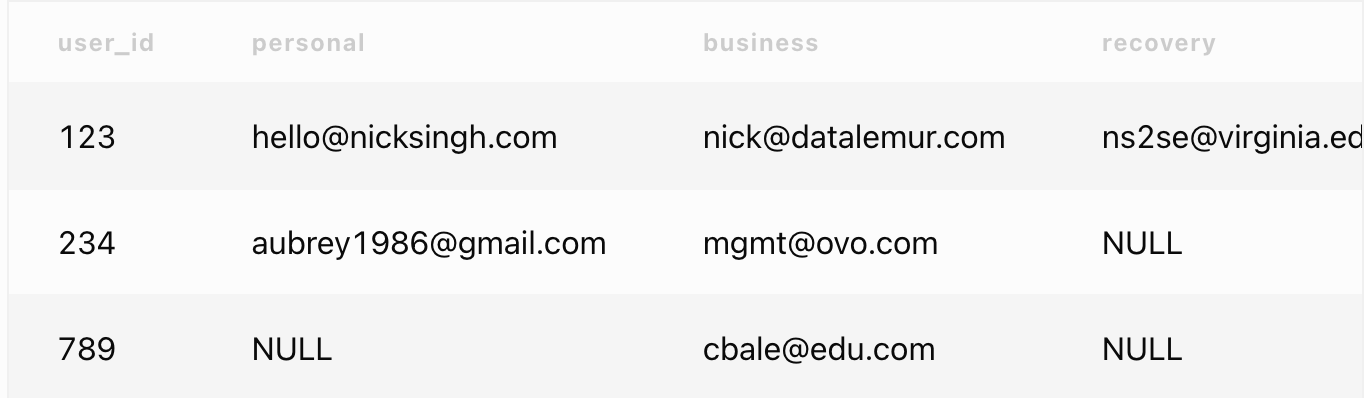

In [10]:
Image(filename='./resources/58.png')

***

### C | T

[Question]():<br>

```sql

```

In [15]:
#Image(filename='./resources/12.png')

***

### C | T

[Question]():<br>

```sql

```

In [15]:
#Image(filename='./resources/12.png')

***

### C | T

[Question]():<br>

```sql

```

In [15]:
#Image(filename='./resources/12.png')

***